# EDA

In [1]:
from function import *

In [40]:
# load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [49]:
data = pd.concat([train, test], axis = 0).reset_index(drop = True)
data.head()

Team  Possession  SOT  Shots  Touches  Passes  Tackles  \
0           Arsenal        70.1    3     23      899     703       16   
1        Sunderland        29.9    2      4      474     294       28   
2            Fulham        59.8    9     15      734     568       11   
3      Norwich City        40.2    2      9      527     376       16   
4  Newcastle United        51.9    3      7      603     405       18   

   Clearances  Corners  Offsides  Goal  Year  Home  Result  
0           7        7         2     0  2012     1       2  
1          34        0         1     0  2012     0       2  
2          28        6         2     5  2012     1       1  
3          24        3         1     0  2012     0       0  
4          35        3         3     2  2012     1       1

In [52]:
ars = data[data['Team'] == 'Arsenal'].reset_index(drop = True)
noars = data[data['Team'] != 'Arsenal'].reset_index(drop = True)

In [78]:
df1 = ars.mean()
df2 = noars.mean()
df3 = pd.DataFrame([df1, df2])

In [79]:
df3 = df3.drop(['Possession', 'Touches', 'Offsides', 'Year', 'Result'], axis = 1)
df3.tail()

SOT      Shots      Passes    Tackles  Clearances   Corners      Goal  \
0  5.662281  15.179825  567.403509  18.447368   24.565789  6.153509  1.872807   
1  4.276547  12.931902  432.472068  18.461450   28.766159  5.303093  1.332179   

   Home  
0   0.5  
1   0.5

In [92]:
y1 = df3[0:1]
y2 = df3[1:2]

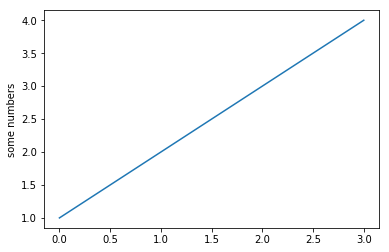

In [104]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

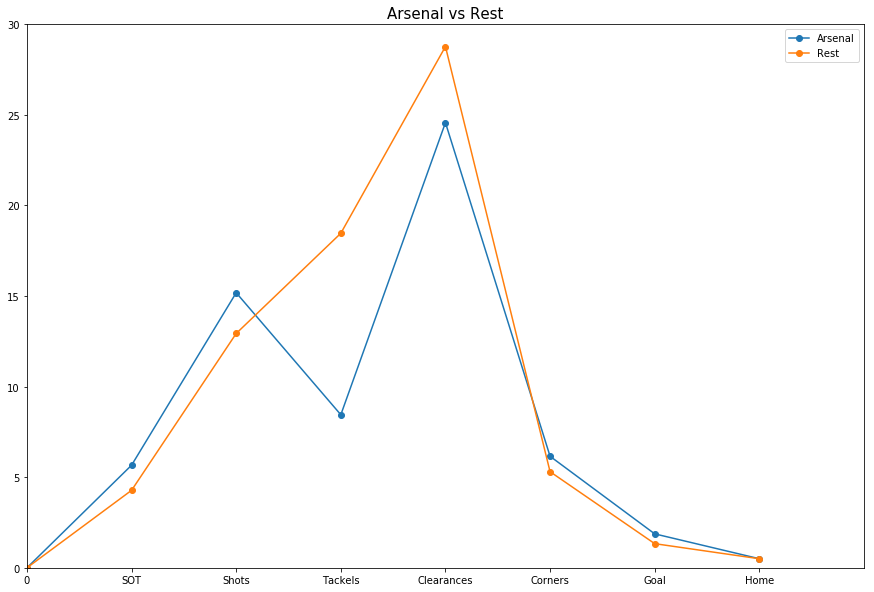

In [152]:
plt.figure(figsize=(15, 10))

num = [0, 'SOT','Shots','Tackels','Clearances','Corners','Goal','Home']
ars = [0, 5.662281,15.179825,8.447368,24.565789,6.153509,1.872807,0.5]
noars = [0, 4.276547,12.931902,18.461450,28.766159,5.303093,1.332179,0.5]

plt.plot(num, ars,num, noars, marker = 'o')

plt.title('Arsenal vs Rest', fontsize = 15)
plt.legend(['Arsenal', 'Rest'], loc = 0)
plt.axis([0,8, 0, 30])
plt.show()

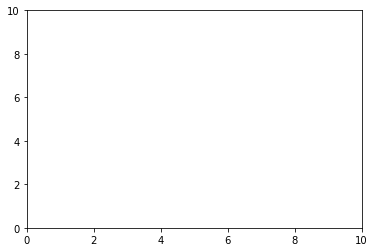

In [110]:
import matplotlib.pyplot as plt
plt.plot(1,2,3,4,5,5)
plt.axis([0,10, 0, 10])
plt.show()

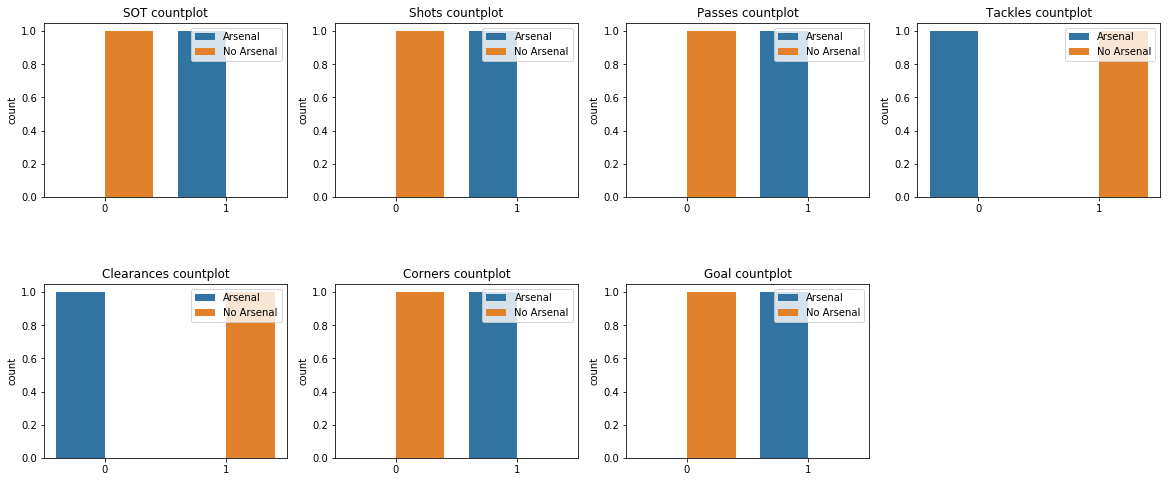

In [86]:
plt.figure(figsize=(20, 8))
subplots_adjust(hspace = 0.5)

for i in range(7):
    plt.subplot(2, 4, i+1)
    sns.countplot(x= df3.index, hue = df3[df3.columns[i]],  data = df3)
    plt.legend(loc = 1, labels = ['Arsenal', 'No Arsenal'])
    plt.title('{} countplot'.format(df3.columns[i]))

---

### 1. Overall information

In [3]:
# check shape
print('train shape :', train.shape) # 12 - 16 season
print('test shape :', test.shape) # 17 season

train shape : (3800, 14)
test shape : (760, 14)


In [4]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
Team          3800 non-null object
Possession    3800 non-null float64
SOT           3800 non-null int64
Shots         3800 non-null int64
Touches       3800 non-null int64
Passes        3800 non-null int64
Tackles       3800 non-null int64
Clearances    3800 non-null int64
Corners       3800 non-null int64
Offsides      3800 non-null int64
Goal          3800 non-null int64
Year          3800 non-null int64
Home          3800 non-null int64
Result        3800 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 415.7+ KB


In [5]:
# Unique
print('train unique 갯수')
for i in range(14):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
Team : 28개
Possession : 509개
SOT : 18개
Shots : 40개
Touches : 536개
Passes : 530개
Tackles : 37개
Clearances : 77개
Corners : 20개
Offsides : 13개
Goal : 9개
Year : 5개
Home : 2개
Result : 3개


---

### 2. Y data

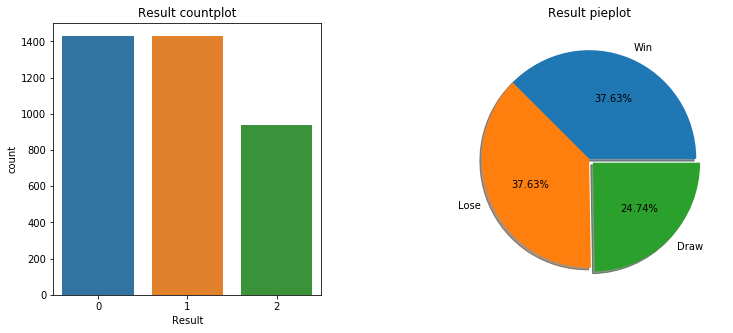

In [6]:
# y_data
plt.figure(figsize=(12, 5))
subplots_adjust(wspace = 0.5)
df = pd.DataFrame([len(train[train['Result'] == 0])/len(train), 
                   len(train[train['Result'] == 1])/len(train), 
                   len(train[train['Result'] == 2])/len(train)], 
                   index=['Lose', 'Win', 'Draw'], columns=['x'])

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x = 'Result', data = train)
plt.title('Result countplot')
labels = 'Win', 'Lose', 'Draw'

# pieplot
plt.subplot(1, 2, 2)
plt.pie(df, labels = labels, autopct='%1.2f%%', shadow = True, explode = (0.0, 0.0, 0.05))
plt.title('Result pieplot')

plt.show()

---

### 3. Y data & X data

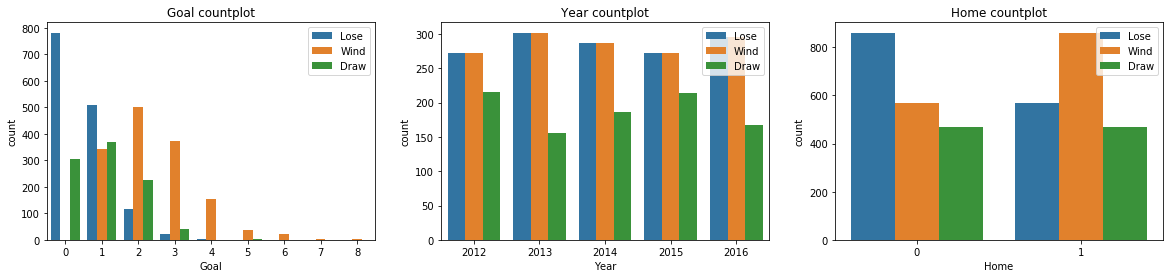

In [14]:
category = ['Goal', 'Year', 'Home']
# category countplot
plt.figure(figsize=(20, 4))
subplots_adjust(hspace = 0.5)

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=train[category[i]], hue = 'Result',  data = train)
    plt.legend(loc = 1, labels = ['Lose', 'Wind', 'Draw'])
    plt.title('{} countplot'.format(train[category].columns[i]))

In [15]:
train.groupby('Result').mean()

Possession       SOT      Shots     Touches      Passes    Tackles  \
Result                                                                       
0         48.21049  3.332168  11.613287  622.753846  419.338462  18.664336   
1         51.78951  5.686713  15.025175  668.597902  460.858741  18.975524   
2         50.00000  3.969149  12.863830  635.107447  425.311702  19.030851   

        Clearances   Corners  Offsides      Goal         Year      Home  
Result                                                                   
0        26.413287  5.116783  2.083916  0.569231  2014.013287  0.397902  
1        31.094406  5.633566  2.179720  2.390210  2014.013287  0.602098  
2        30.526596  5.417021  2.080851  1.008511  2013.959574  0.500000

In [38]:
# Possession
possession0 = result0['Possession']
possession1 = result1['Possession']
possession2 = result2['Possession']

F_statistic, pVal = stats.f_oneway(possession0, possession1, possession2)

print('Possession 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 0.05보다 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 0.05보다 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Possession 변수의 일원분산분석 결과 : F=39.3, p=0.00000


P-value 값이 0.05보다 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [26]:
# SOT
sot0 = result0['SOT']
sot1 = result1['SOT']
sot2 = result2['SOT']

F_statistic, pVal = stats.f_oneway(sot0, sot1, sot2)

print('SOT 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 0.05보다 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 0.05보다 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


SOT 변수의 일원분산분석 결과 : F=411.2, p=0.00000


P-value 값이 0.05보다 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [27]:
# Shots
shots0 = result0['Shots']
shots1 = result1['Shots']
shots2 = result2['Shots']

F_statistic, pVal = stats.f_oneway(shots0, shots1, shots2)

print('Shots 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Shots 변수의 일원분산분석 결과 : F=151.4, p=0.00000


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [29]:
# Touches
touches0 = result0['Touches']
touches1 = result1['Touches']
touches2 = result2['Touches']

F_statistic, pVal = stats.f_oneway(touches0, touches1, touches2)

print('Touches 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Touches 변수의 일원분산분석 결과 : F=63.3, p=0.00000


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [30]:
# Passes
passes0 = result0['Passes']
passes1 = result1['Passes']
passes2 = result2['Passes']

F_statistic, pVal = stats.f_oneway(passes0, passes1, passes2)

print('Passes 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Passes 변수의 일원분산분석 결과 : F=55.9, p=0.00000


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [31]:
# Tackles
tackles0 = result0['Tackles']
tackles1 = result1['Tackles']
tackles2 = result2['Tackles']

F_statistic, pVal = stats.f_oneway(tackles0, tackles1, tackles2)

print('Tackles 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Tackles 변수의 일원분산분석 결과 : F=1.6, p=0.20113


P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.


In [32]:
# Clearances
clearances0 = result0['Clearances']
clearances1 = result1['Clearances']
clearances2 = result2['Clearances']

F_statistic, pVal = stats.f_oneway(clearances0, clearances1, clearances2)

print('Clearances 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Clearances 변수의 일원분산분석 결과 : F=66.8, p=0.00000


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [33]:
# Corners
corners0 = result0['Corners']
corners1 = result1['Corners']
corners2 = result2['Corners']

F_statistic, pVal = stats.f_oneway(corners0, corners1, corners2)

print('Corners 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Corners 변수의 일원분산분석 결과 : F=11.0, p=0.00002


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [34]:
# Offsides
offsides0 = result0['Offsides']
offsides1 = result1['Offsides']
offsides2 = result2['Offsides']

F_statistic, pVal = stats.f_oneway(offsides0, offsides1, offsides2)

print('Offsides 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Offsides 변수의 일원분산분석 결과 : F=1.6, p=0.21154


P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.


In [35]:
# Goal
goal0 = result0['Goal']
goal1 = result1['Goal']
goal2 = result2['Goal']

F_statistic, pVal = stats.f_oneway(goal0, goal1, goal2)

print('Goal 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Goal 변수의 일원분산분석 결과 : F=1421.3, p=0.00000


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


In [36]:
# Year
year0 = result0['Year']
year1 = result1['Year']
year2 = result2['Year']

F_statistic, pVal = stats.f_oneway(year0, year1, year2)

print('Year 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Year 변수의 일원분산분석 결과 : F=0.5, p=0.60054


P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.


In [37]:
# Home
home0 = result0['Home']
home1 = result1['Home']
home2 = result2['Home']

F_statistic, pVal = stats.f_oneway(home0, home1, home2)

print('Home 변수의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
print('\n')
if pVal < 0.05:
    print('P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.')
else :
    print('P-value 값이 크기 때문에 그룹간 평균값은 차이가 나지 않는걸로 판단됩니다.')


Home 변수의 일원분산분석 결과 : F=61.5, p=0.00000


P-value 값이 작기 때문에 그룹의 평균값이 차이난다고 판단됩니다.


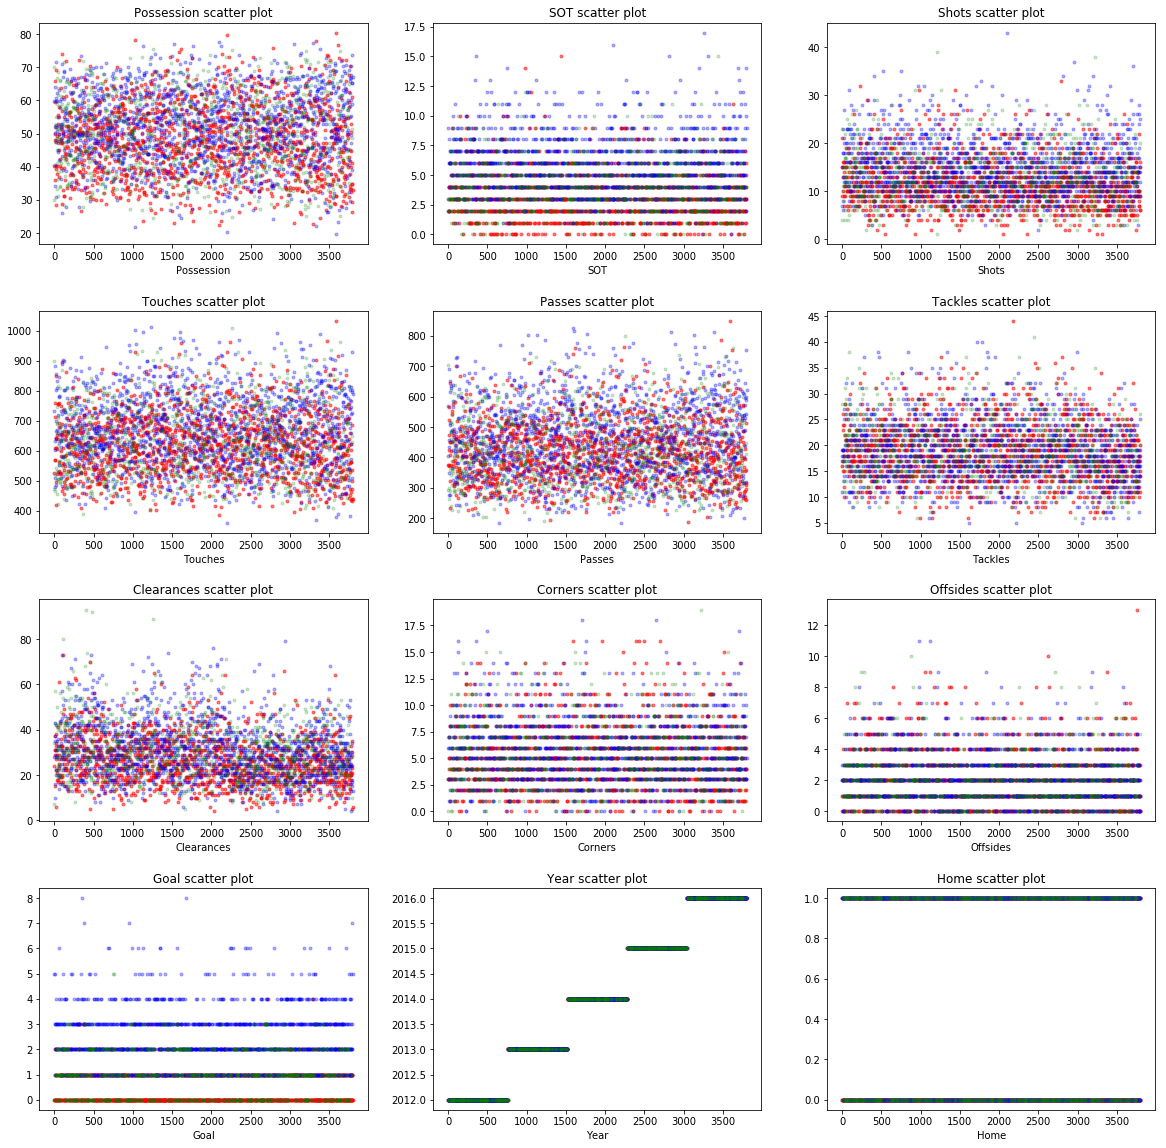

In [17]:
# scatter plot
result0 = train[train['Result'] == 0]
result1 = train[train['Result'] == 1]
result2 = train[train['Result'] == 2]

# feature scatter plot
plt.figure(figsize=(20, 20))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    plt.plot(result0[result0.columns[i]], 'ro', alpha = 0.5, markersize = 3)
    plt.plot(result1[result1.columns[i]], 'bo', alpha = 0.3, markersize = 3)
    plt.plot(result2[result2.columns[i]], 'go', alpha = 0.2, markersize = 3)
    plt.title('{} scatter plot'.format(result0.columns[i]))
    plt.xlabel(result0.columns[i])

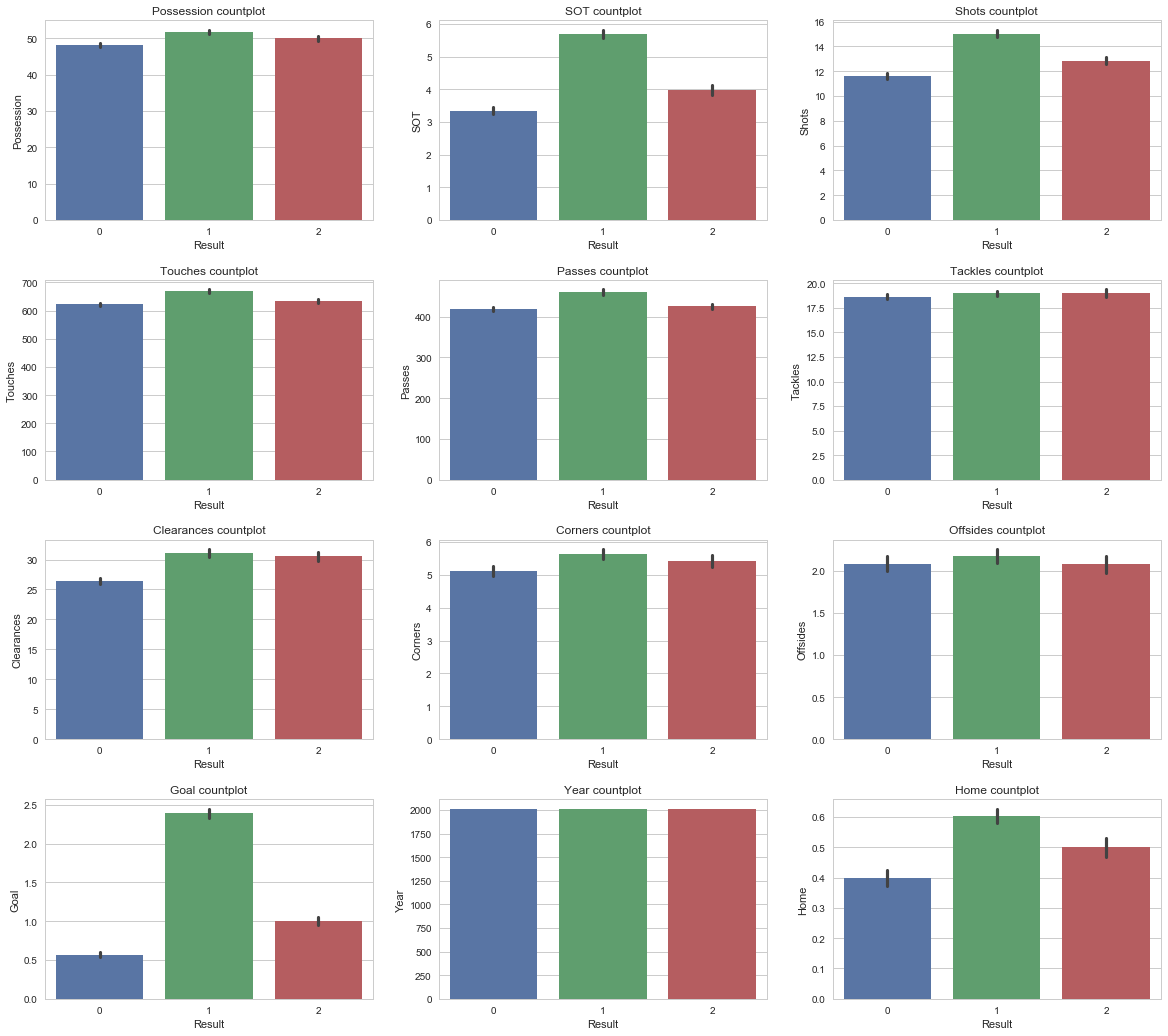

In [8]:
# feature countplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.barplot(x = train['Result'], y = train[train.columns[i]],)
    plt.title('{} countplot'.format(train.columns[i]))

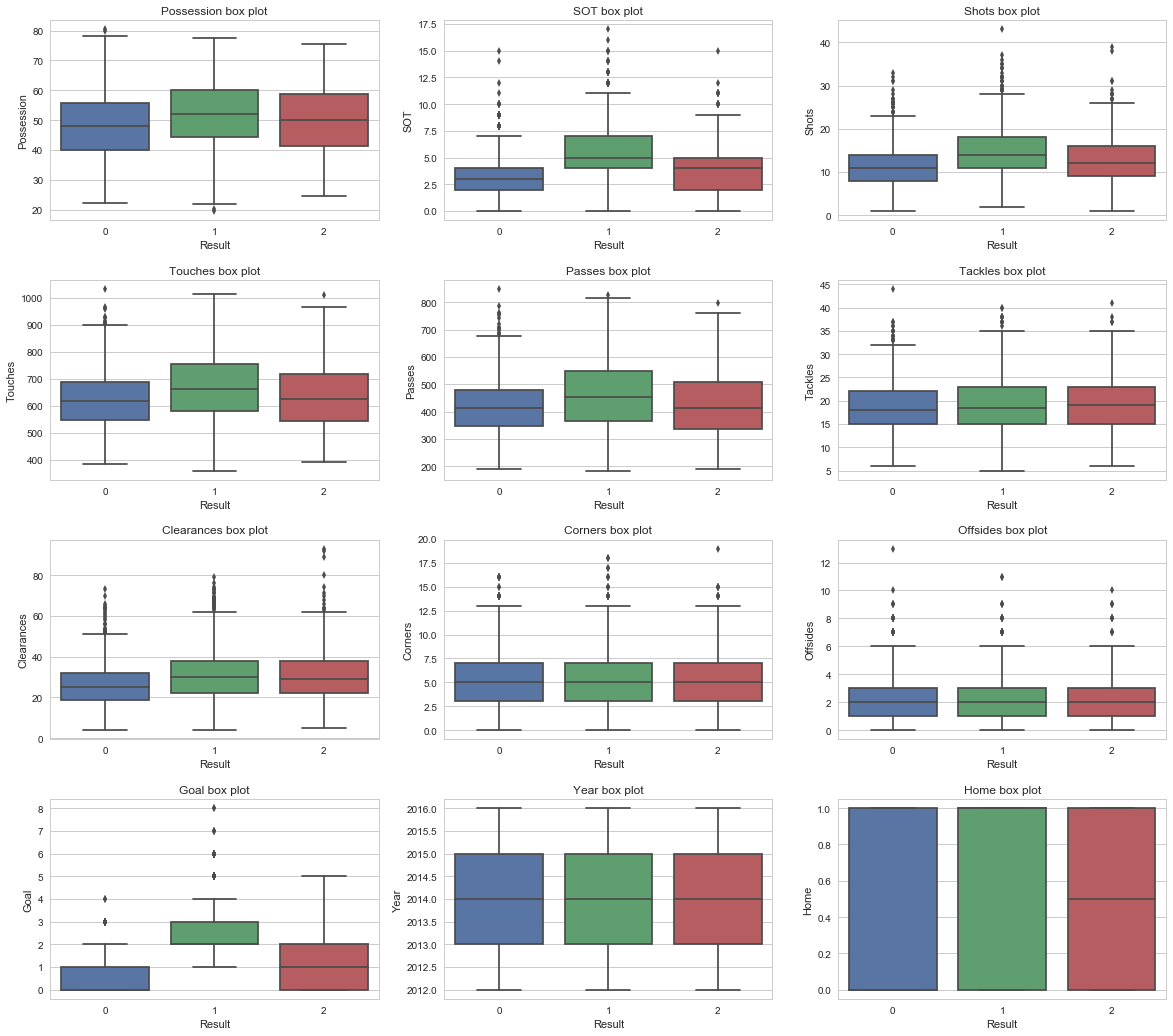

In [14]:
# feature boxplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], data = train)
    plt.title('{} box plot'.format(train.columns[i]))

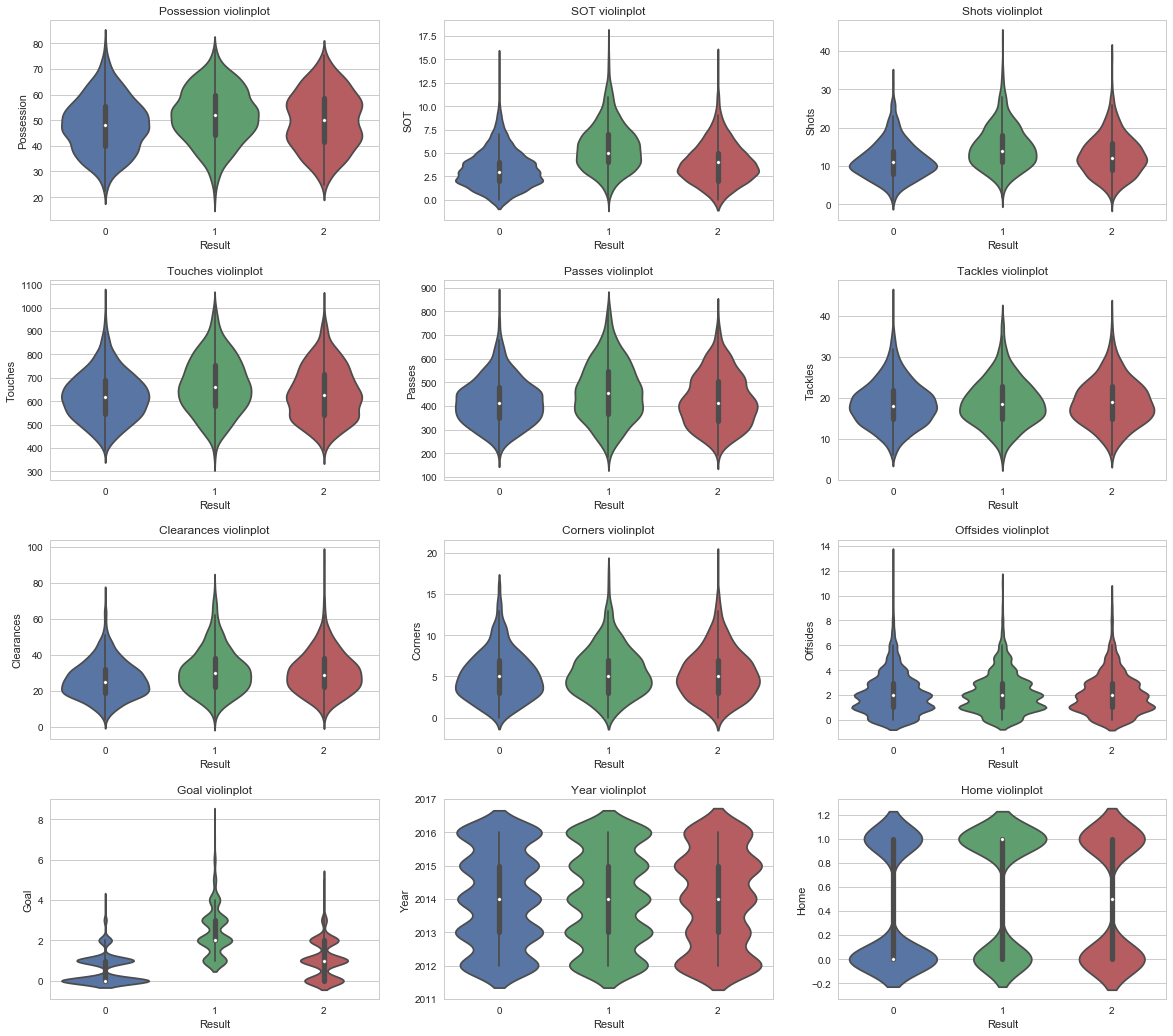

In [21]:
# feature violinplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.violinplot(x = train['Result'], y = train[train.columns[i]], data = train)
    plt.title('{} violinplot'.format(train.columns[i]))

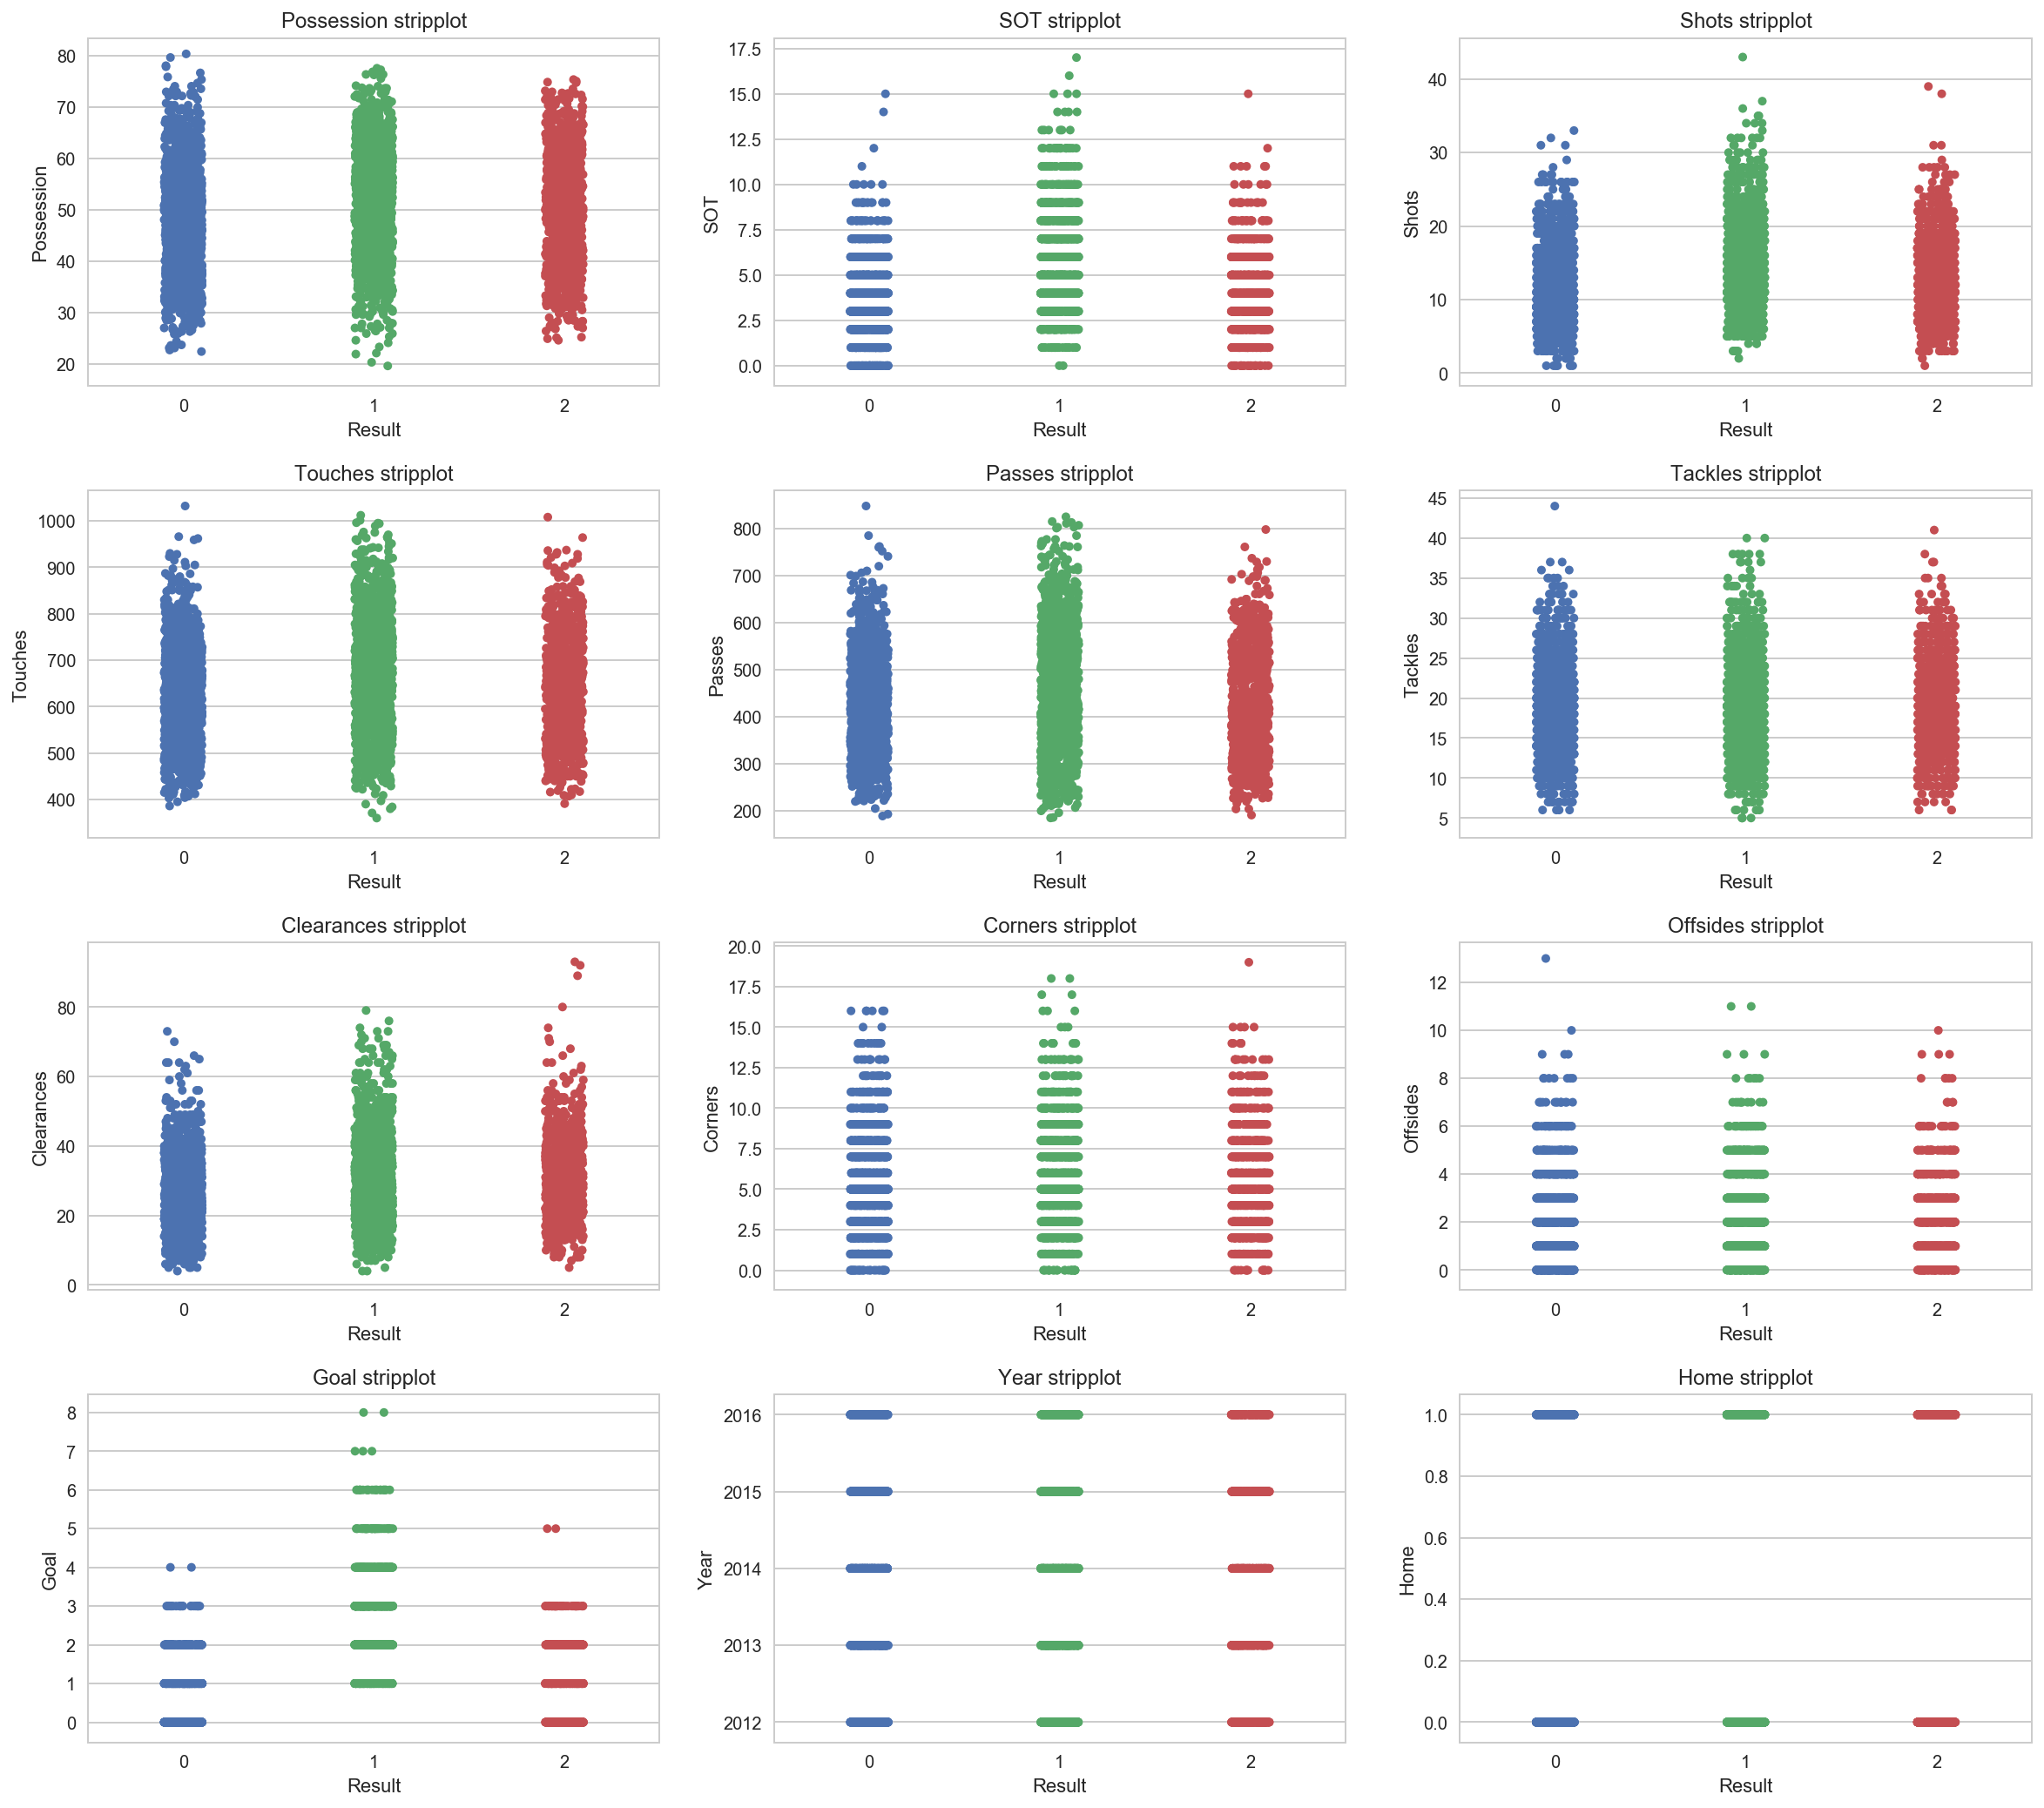

In [11]:
# feature stripplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.stripplot(x = train['Result'], y = train[train.columns[i]], data = train, jitter=True)
    plt.title('{} stripplot'.format(train.columns[i]))

---

### 4. Y data & X data(two features)

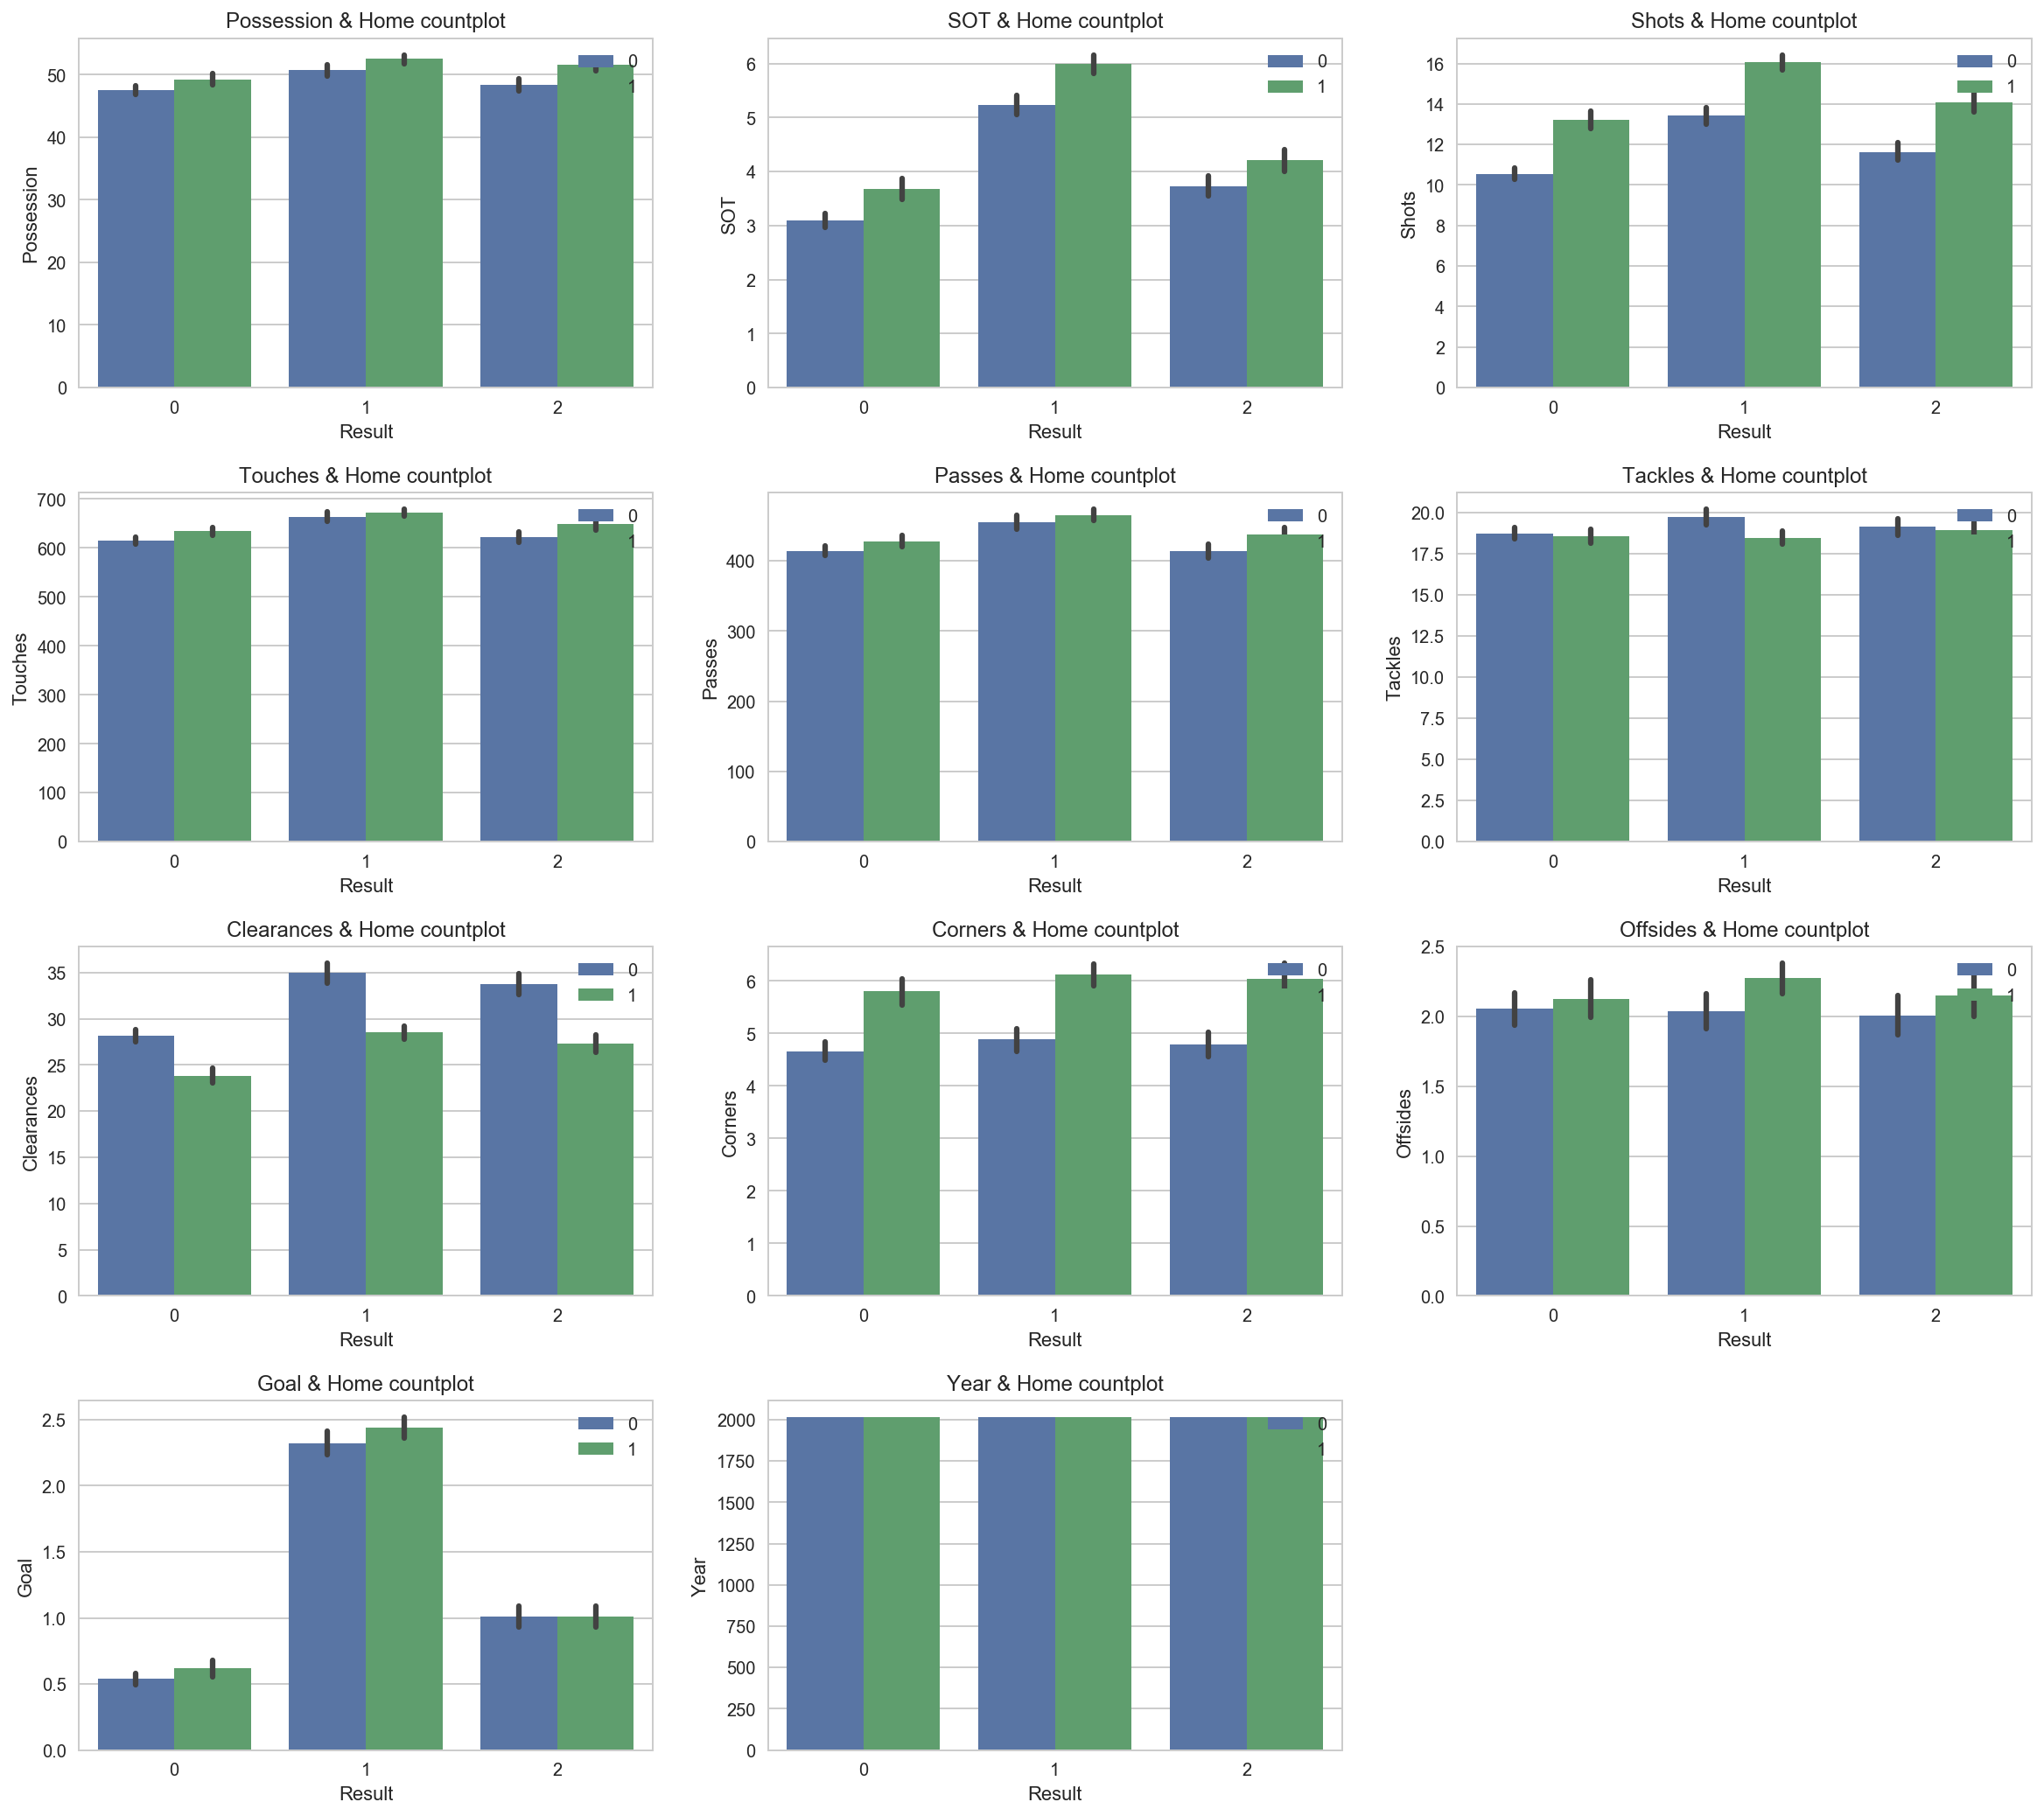

In [12]:
# detail countplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 11+1) :
    plt.subplot(4, 3, i)
    sns.barplot(x = train['Result'], y = train[train.columns[i]], hue = 'Home', data = train)
    plt.legend(loc = 1)
    plt.title('{} & Home countplot'.format(train.columns[i]))

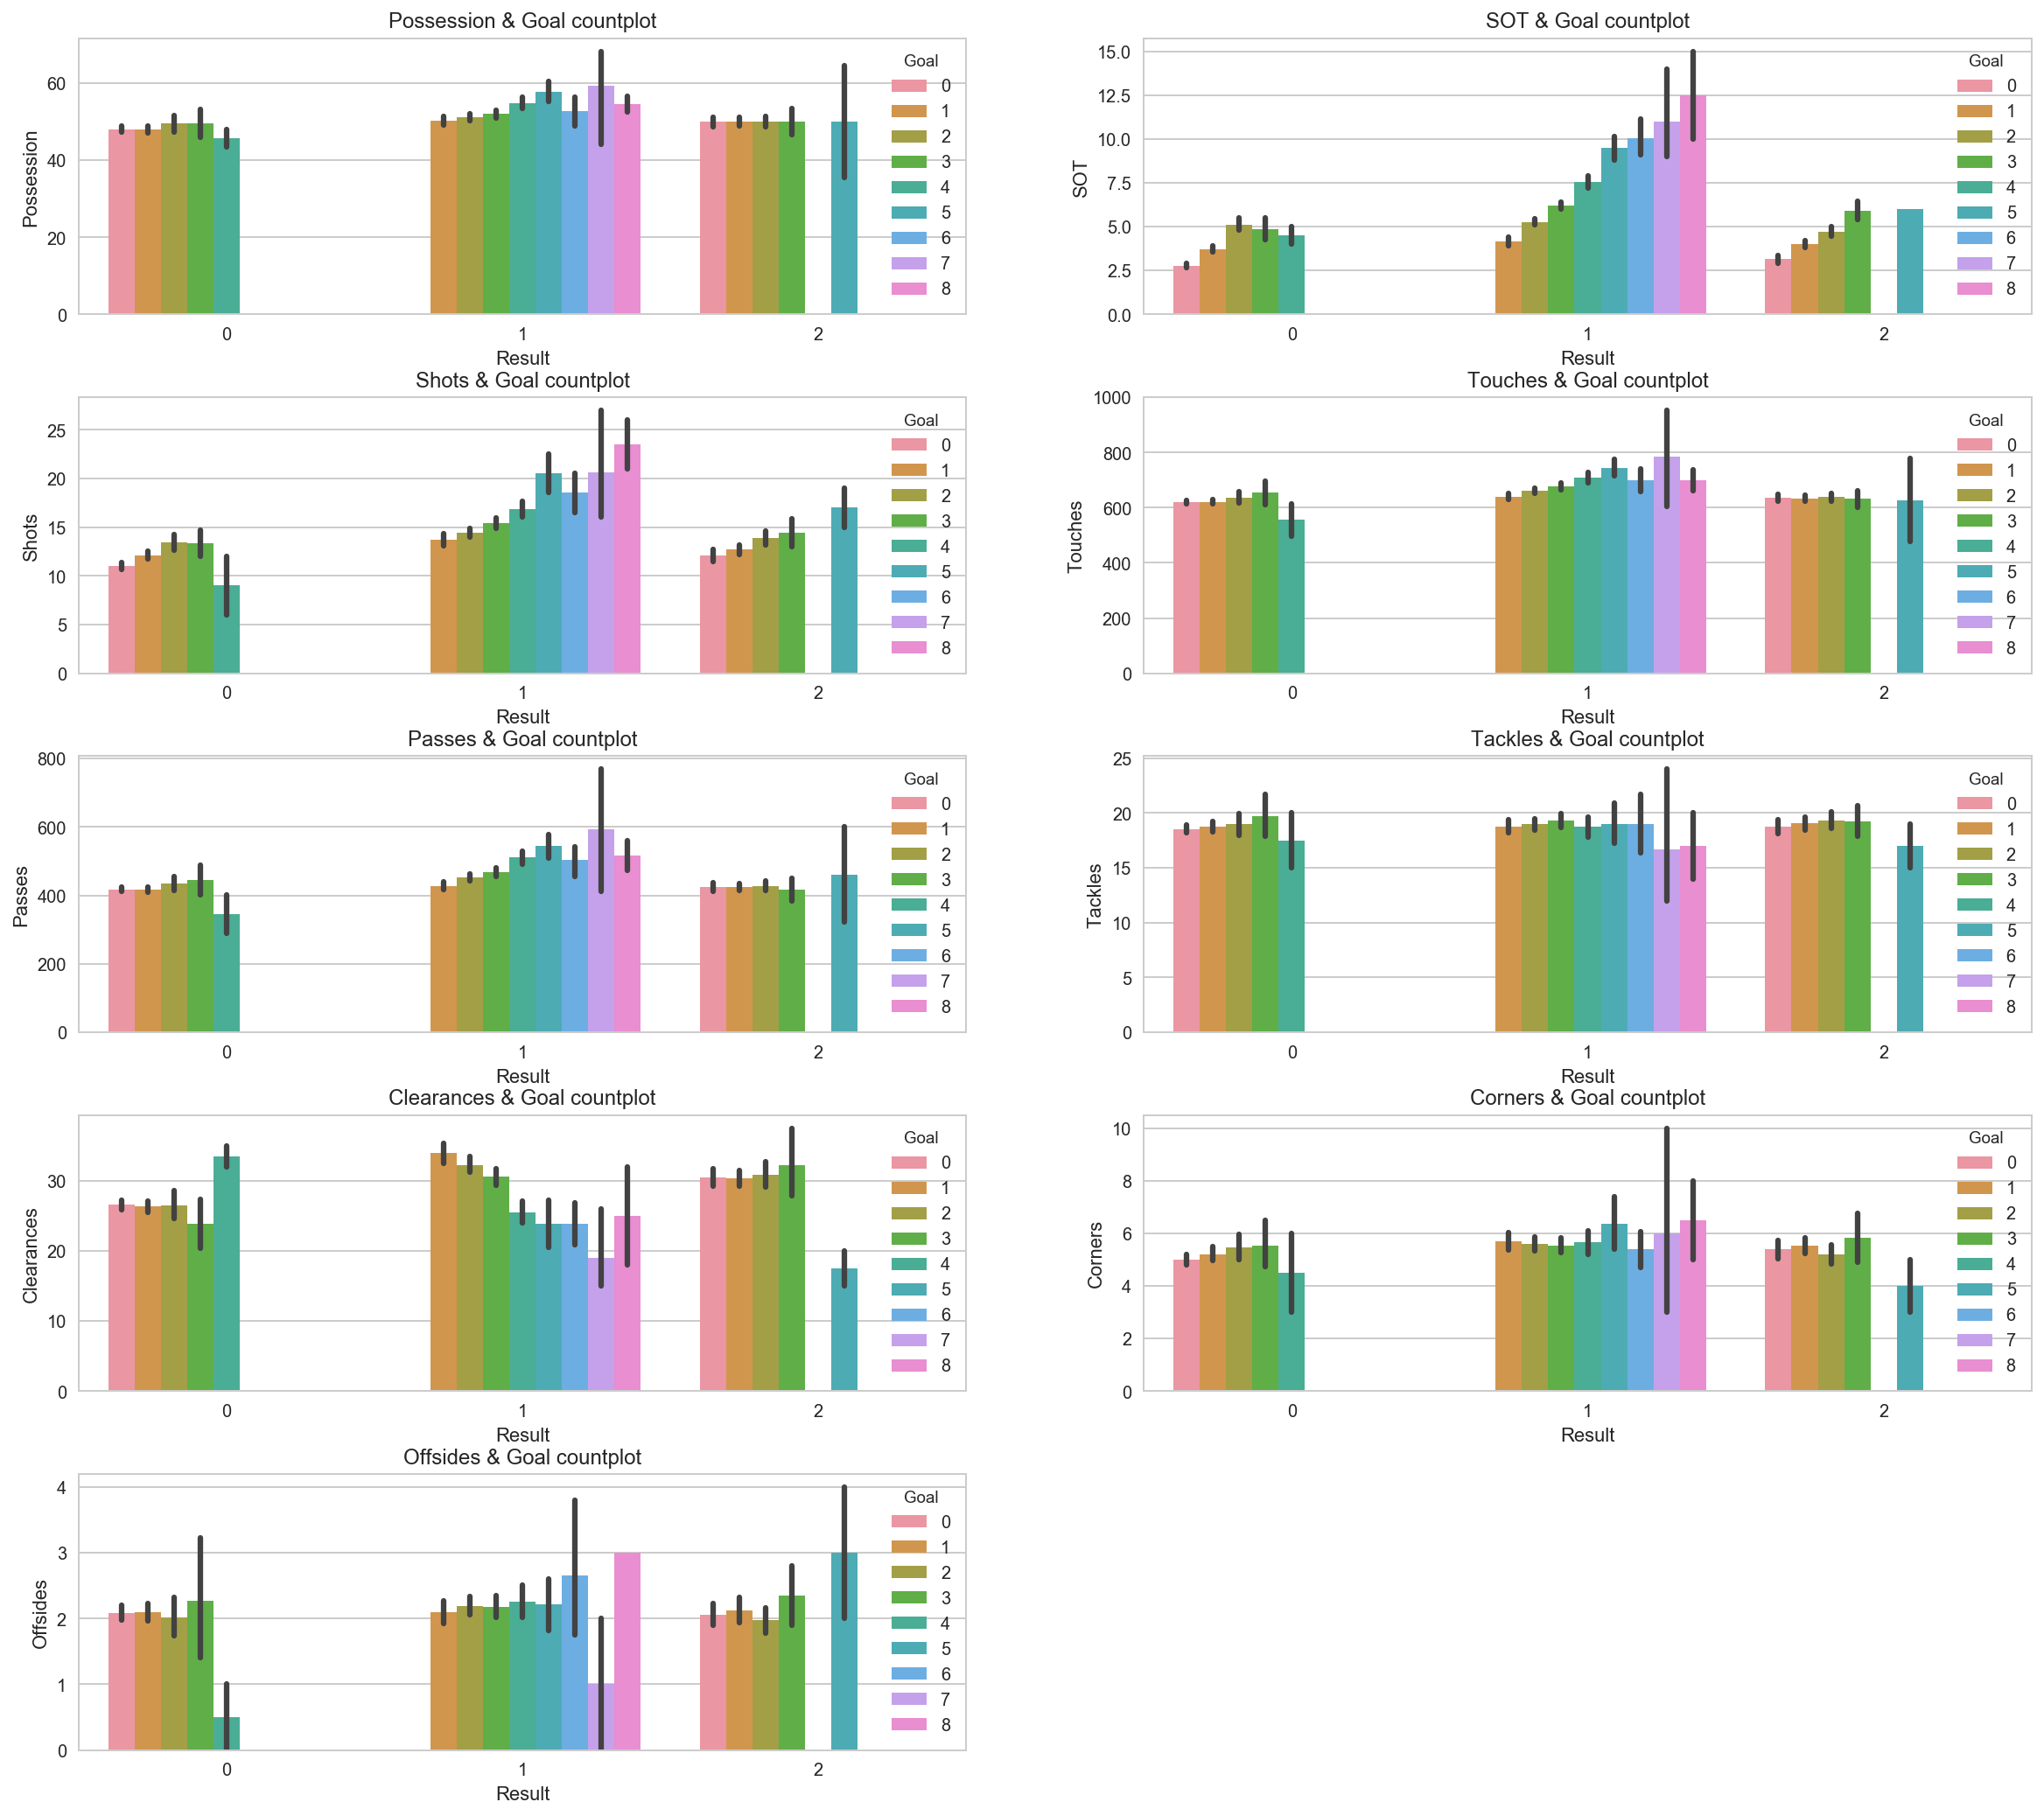

In [13]:
# detail countplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 9+1) :
    plt.subplot(5, 2, i)
    sns.barplot(x = train['Result'], y = train[train.columns[i]], hue = 'Goal', data = train)
    plt.title('{} & Goal countplot'.format(train.columns[i]))

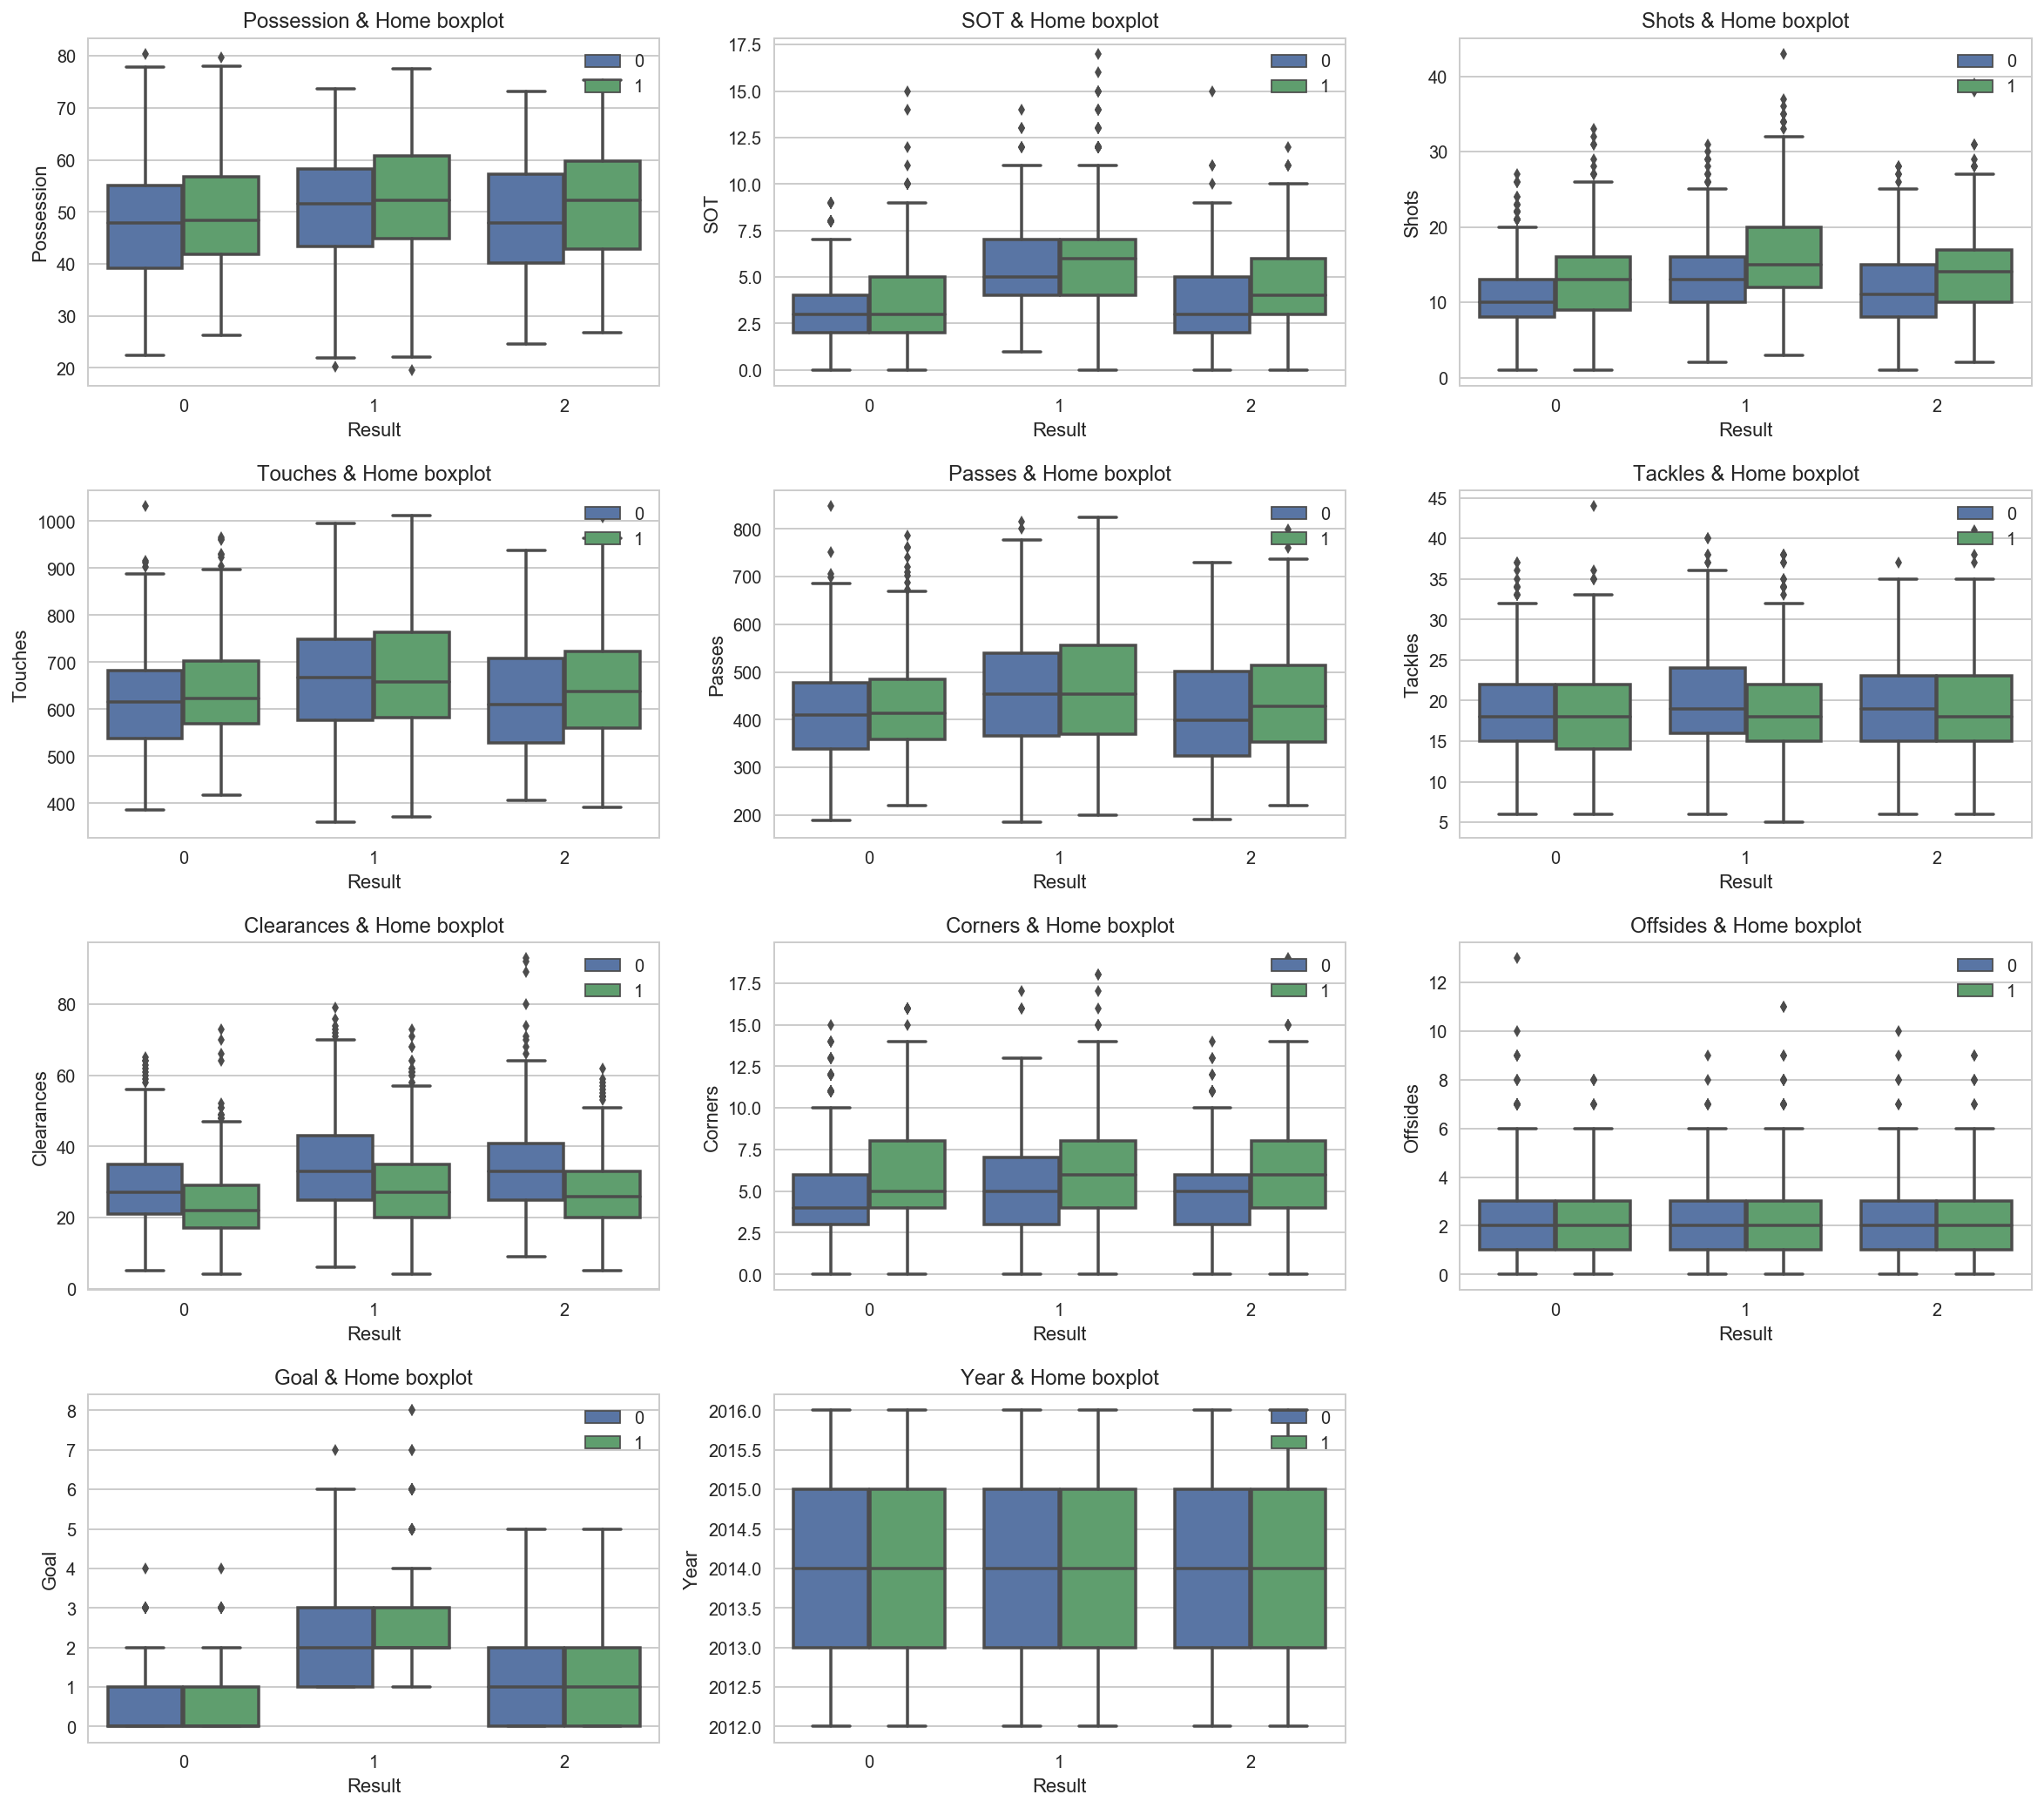

In [14]:
# detail boxplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 11+1) :
    plt.subplot(4, 3, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], hue = 'Home', data = train)
    plt.legend(loc = 1)
    plt.title('{} & Home boxplot'.format(train.columns[i]))

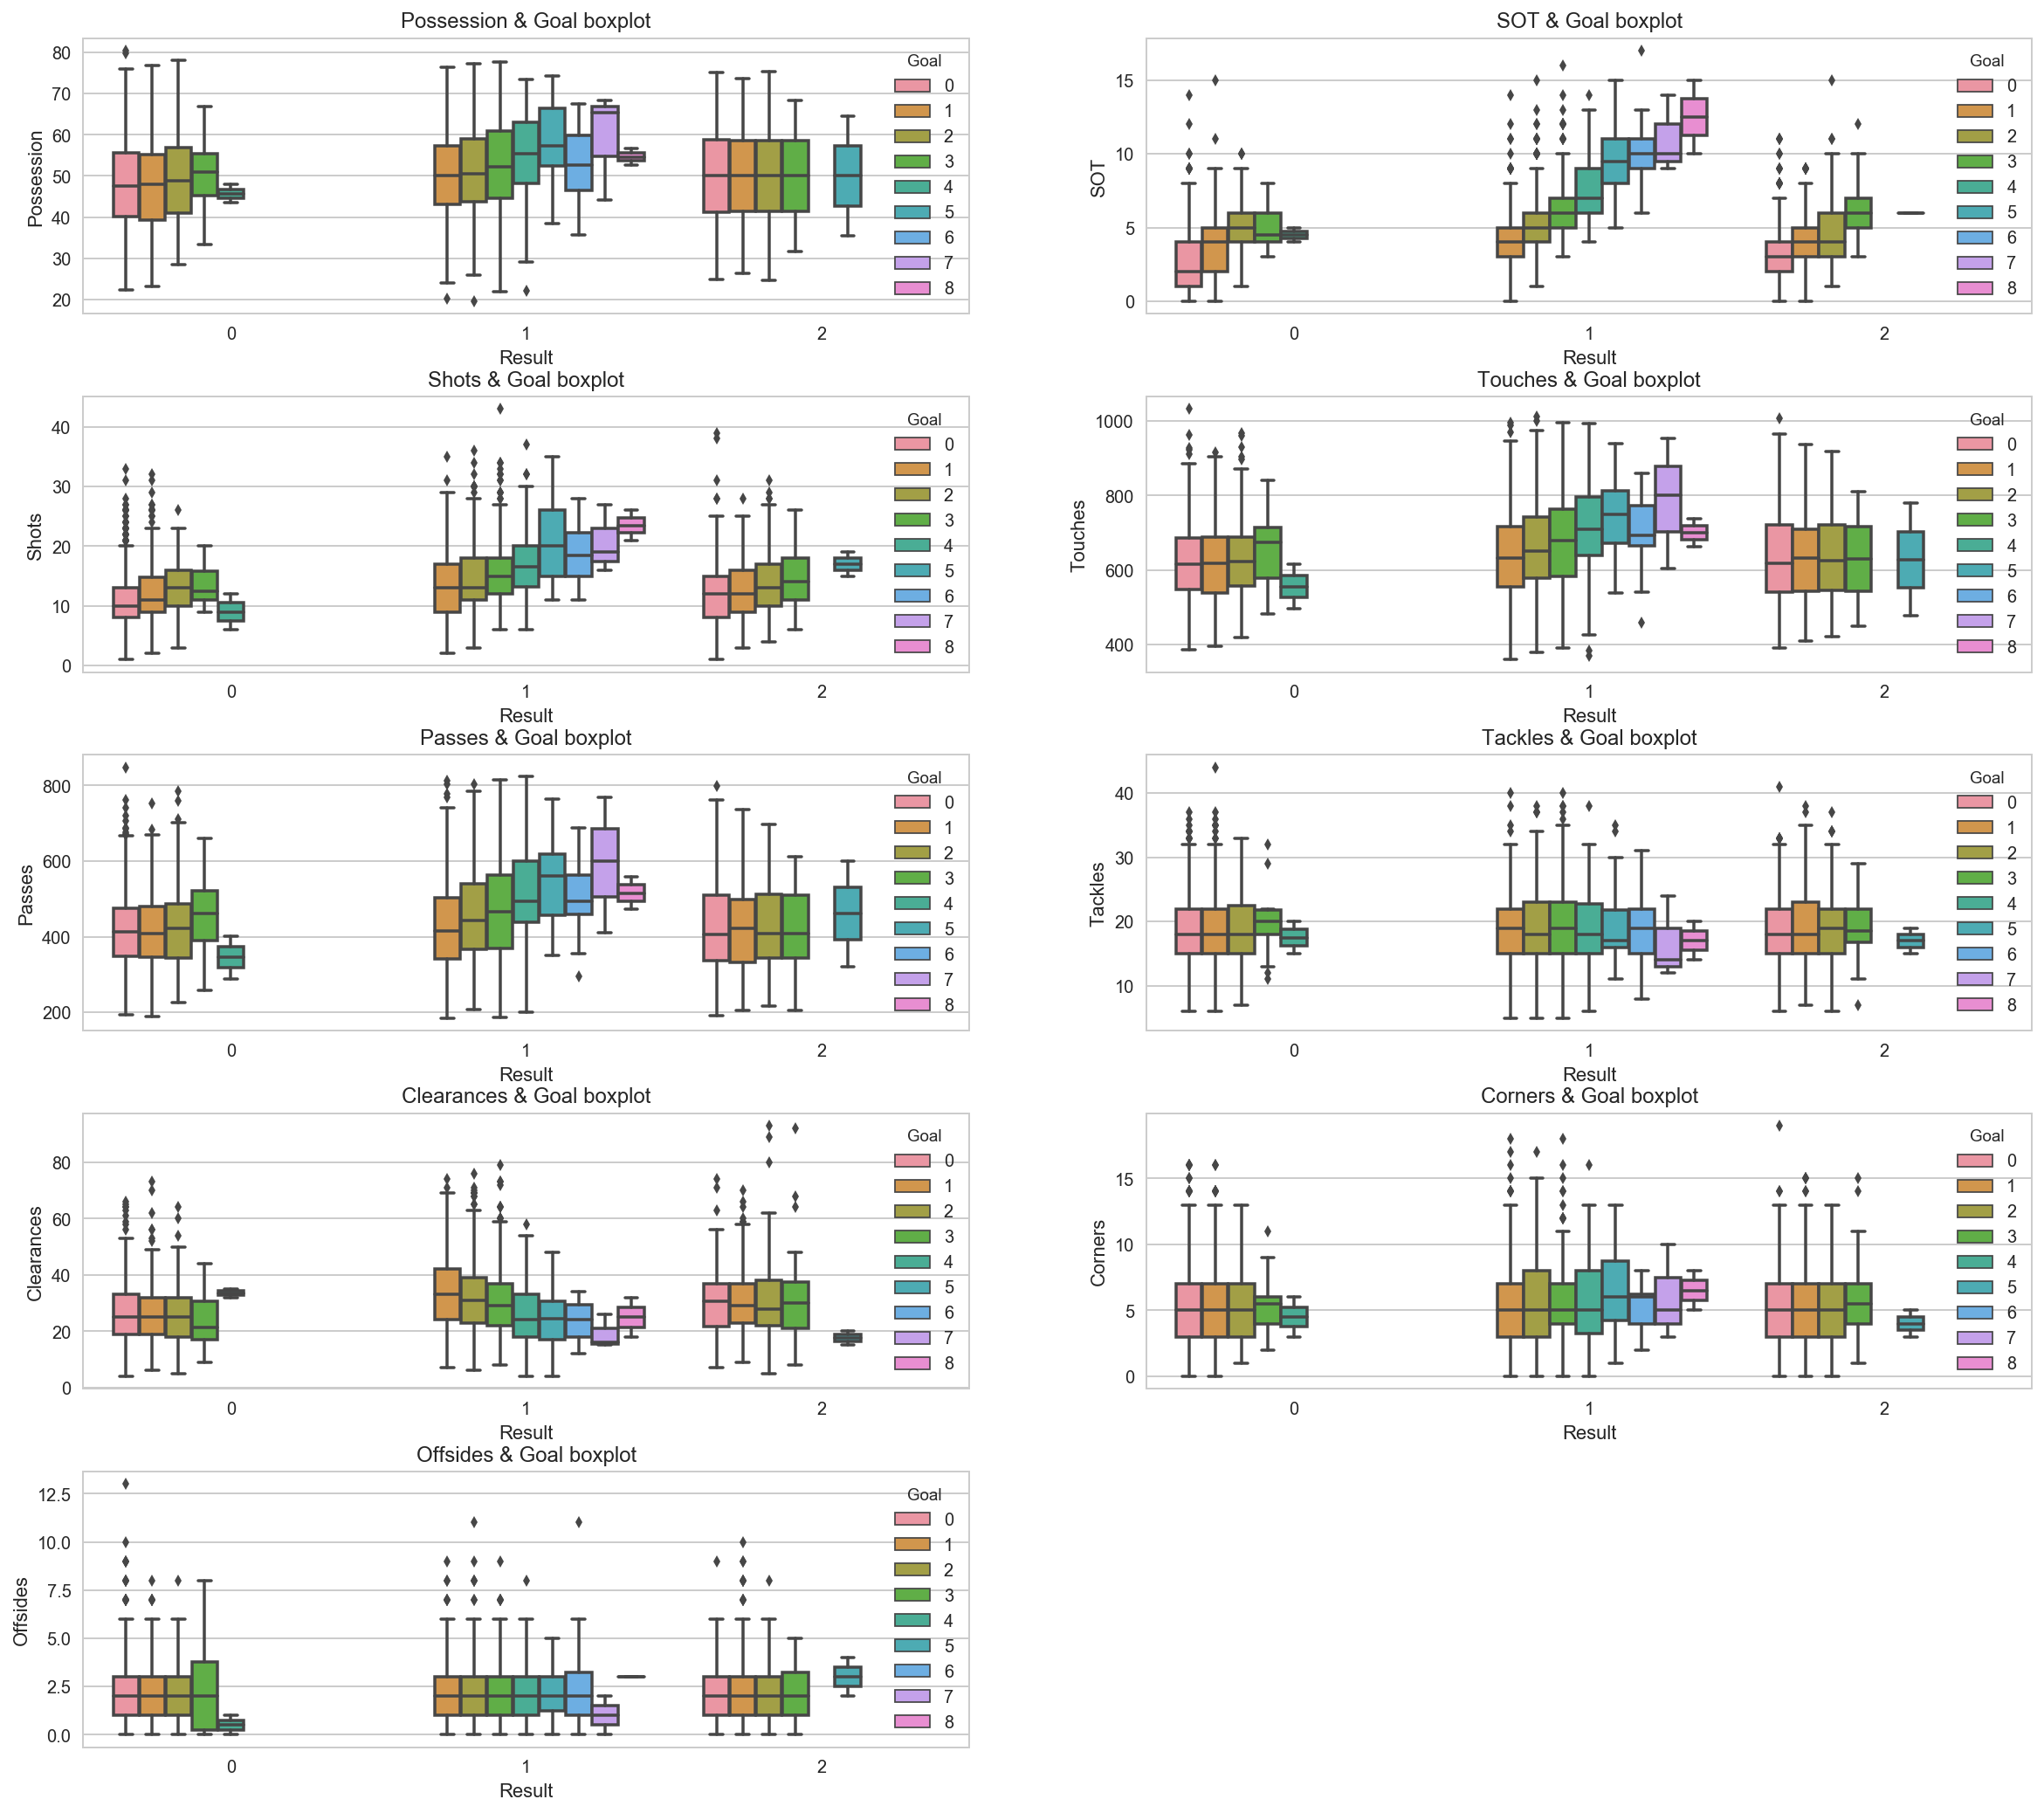

In [15]:
# detail boxplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 9+1) :
    plt.subplot(5, 2, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], hue = 'Goal', data = train)
    plt.title('{} & Goal boxplot'.format(train.columns[i]))

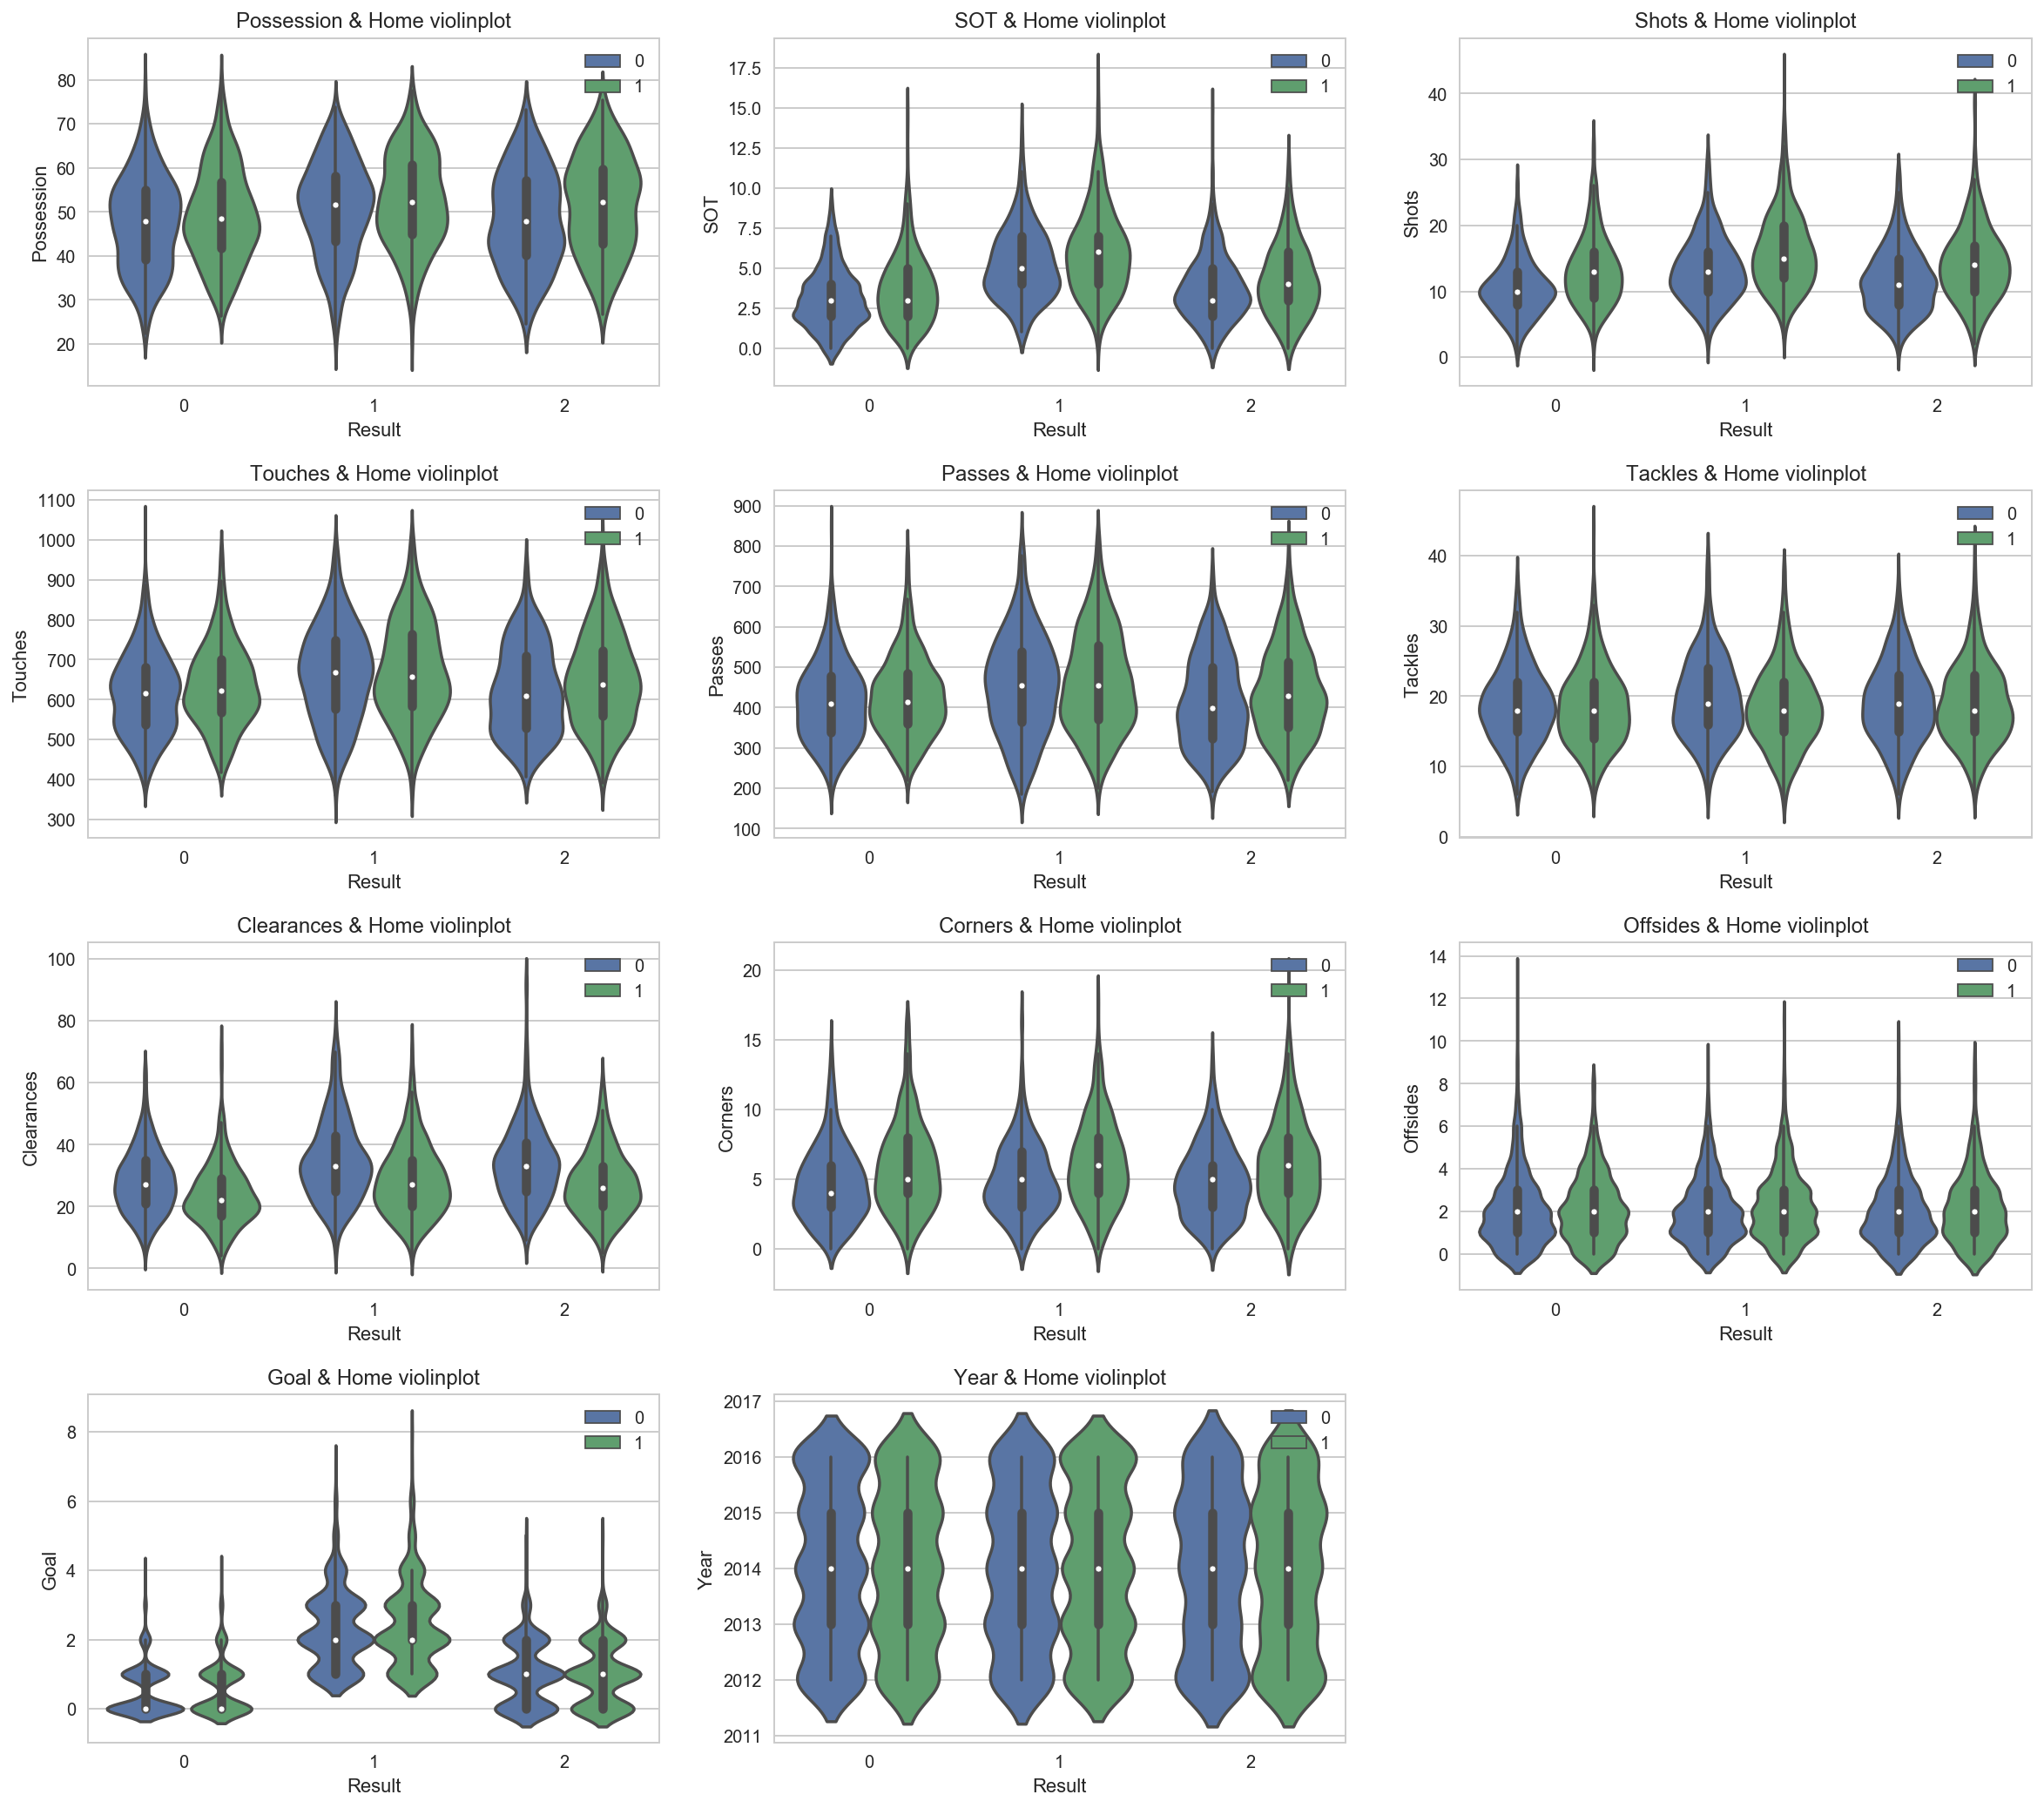

In [16]:
# detail violinplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 11+1) :
    plt.subplot(4, 3, i)
    sns.violinplot(x = train['Result'], y = train[train.columns[i]], hue = 'Home', data = train)
    plt.legend(loc = 1)
    plt.title('{} & Home violinplot'.format(train.columns[i]))

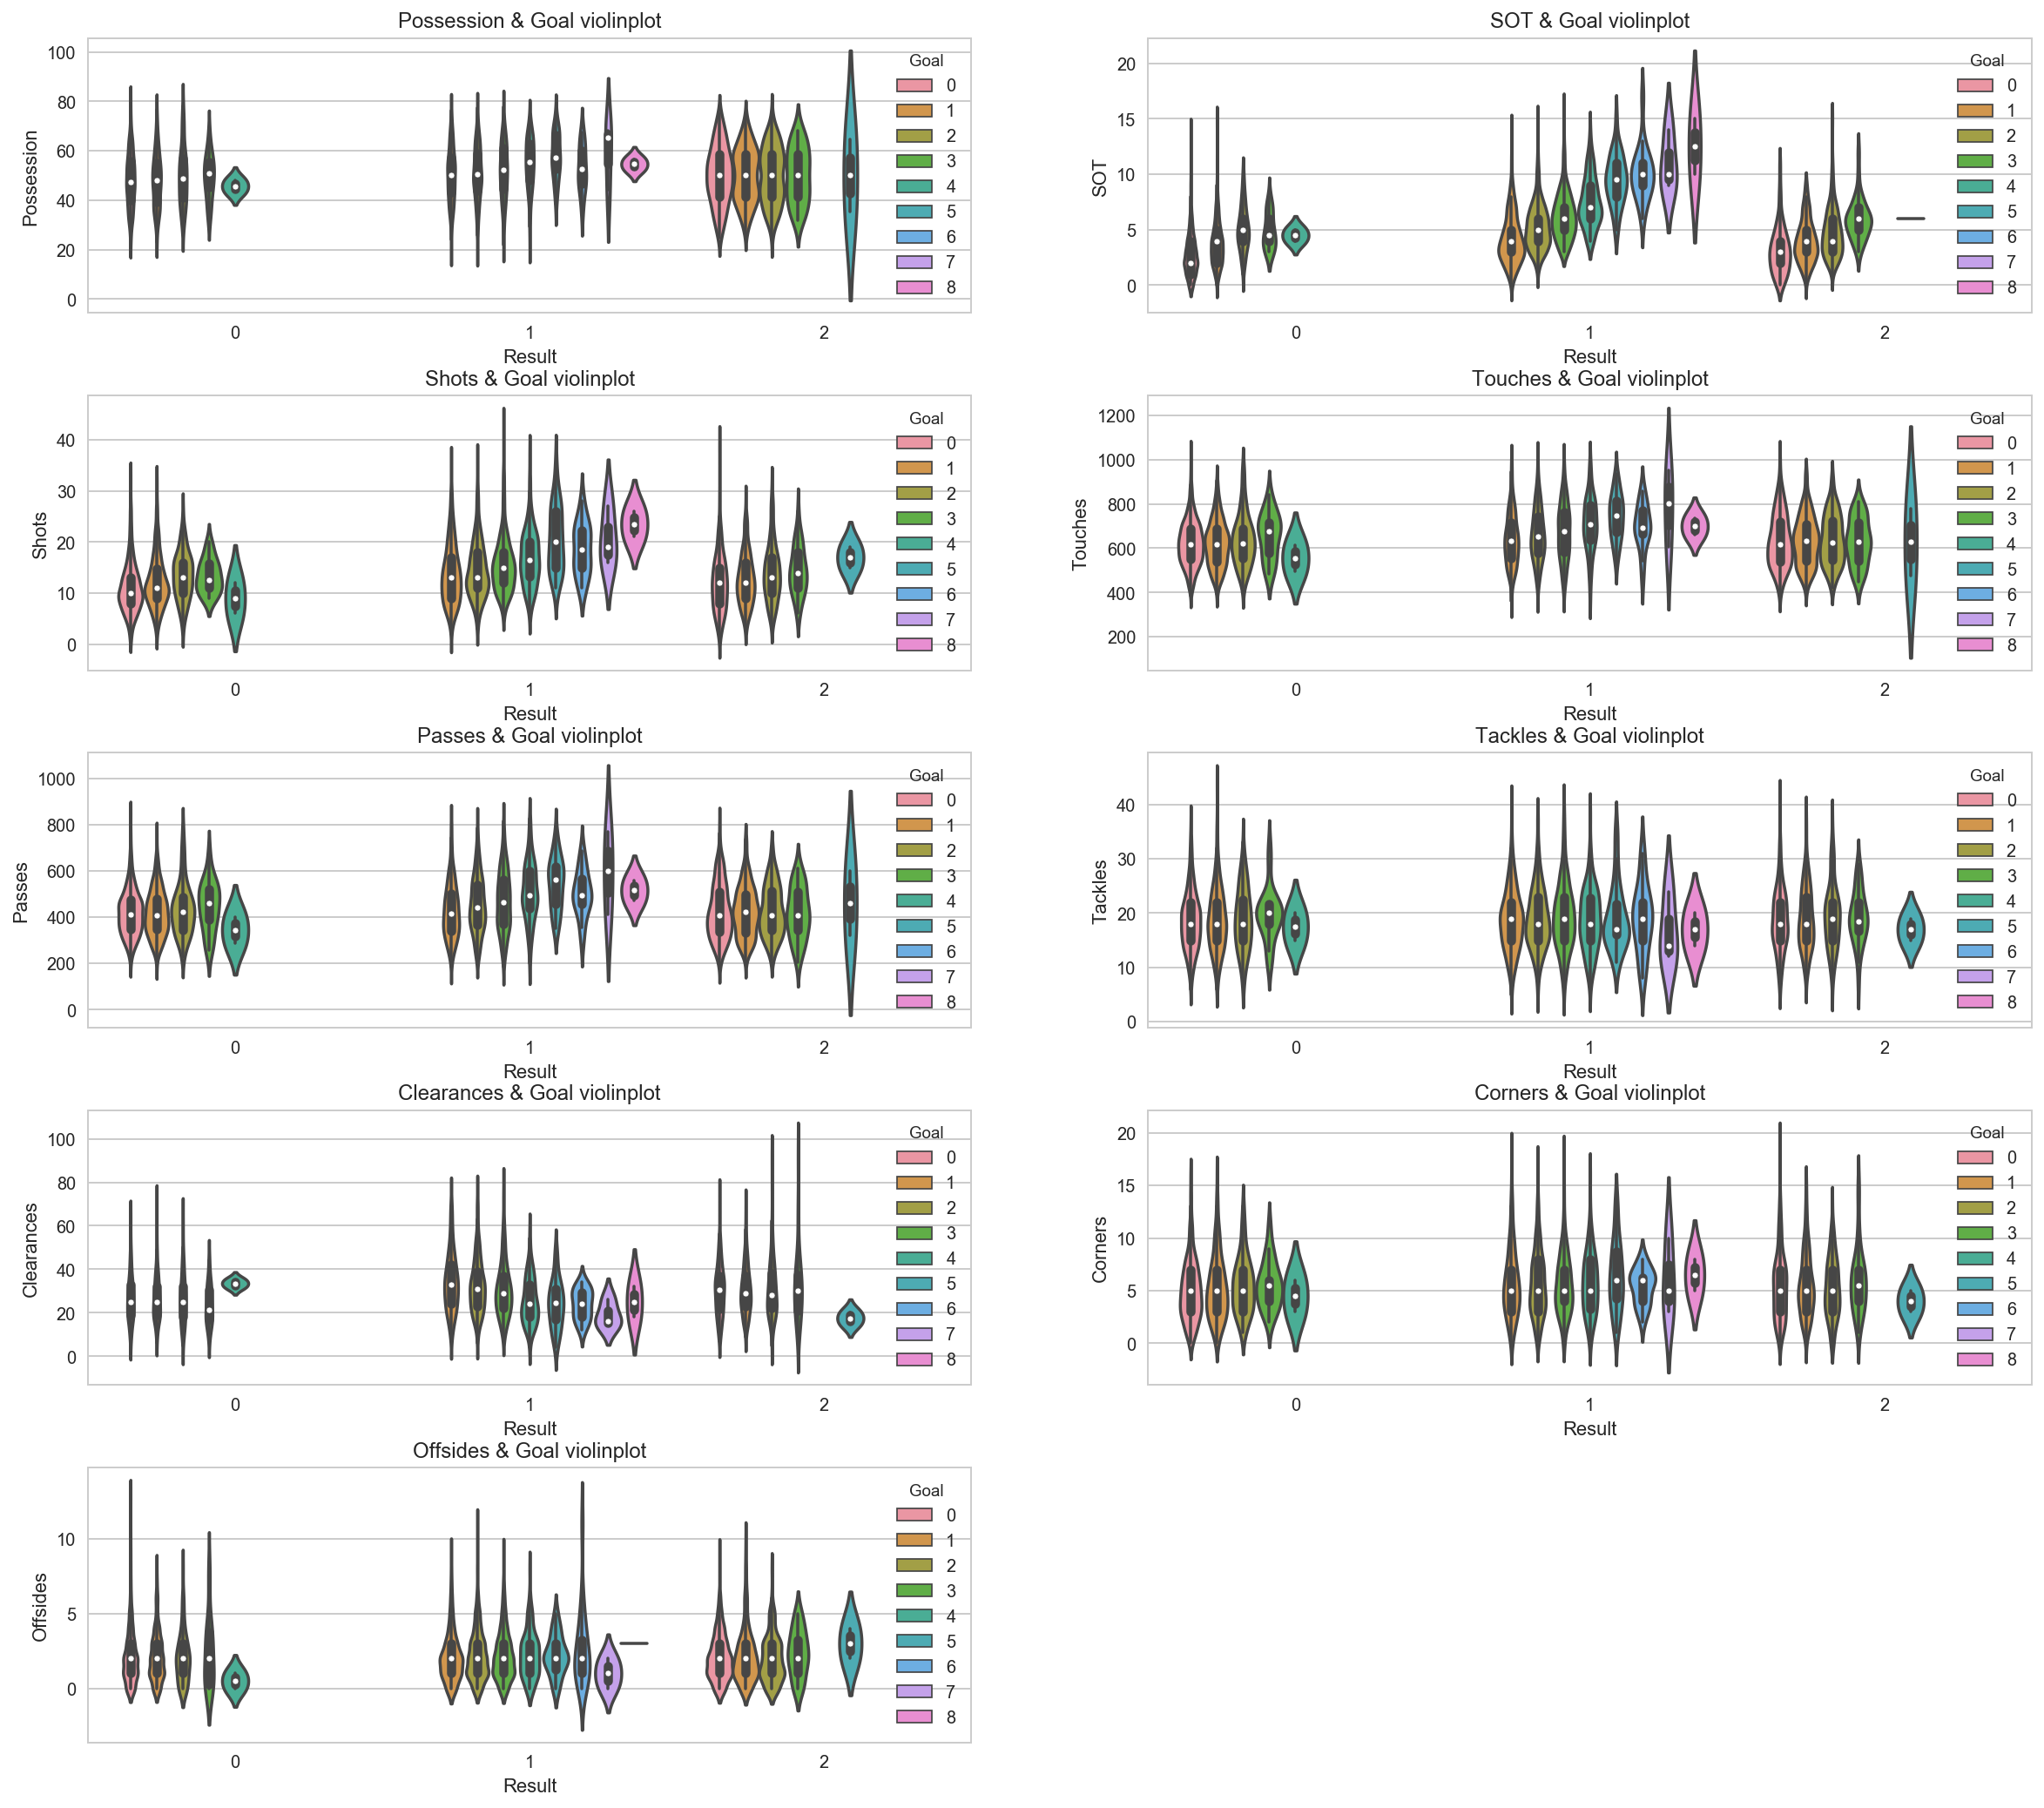

In [17]:
# detail violinplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 9+1) :
    plt.subplot(5, 2, i)
    sns.violinplot(x = train['Result'], y = train[train.columns[i]], hue = 'Goal', data = train)
    plt.title('{} & Goal violinplot'.format(train.columns[i]))

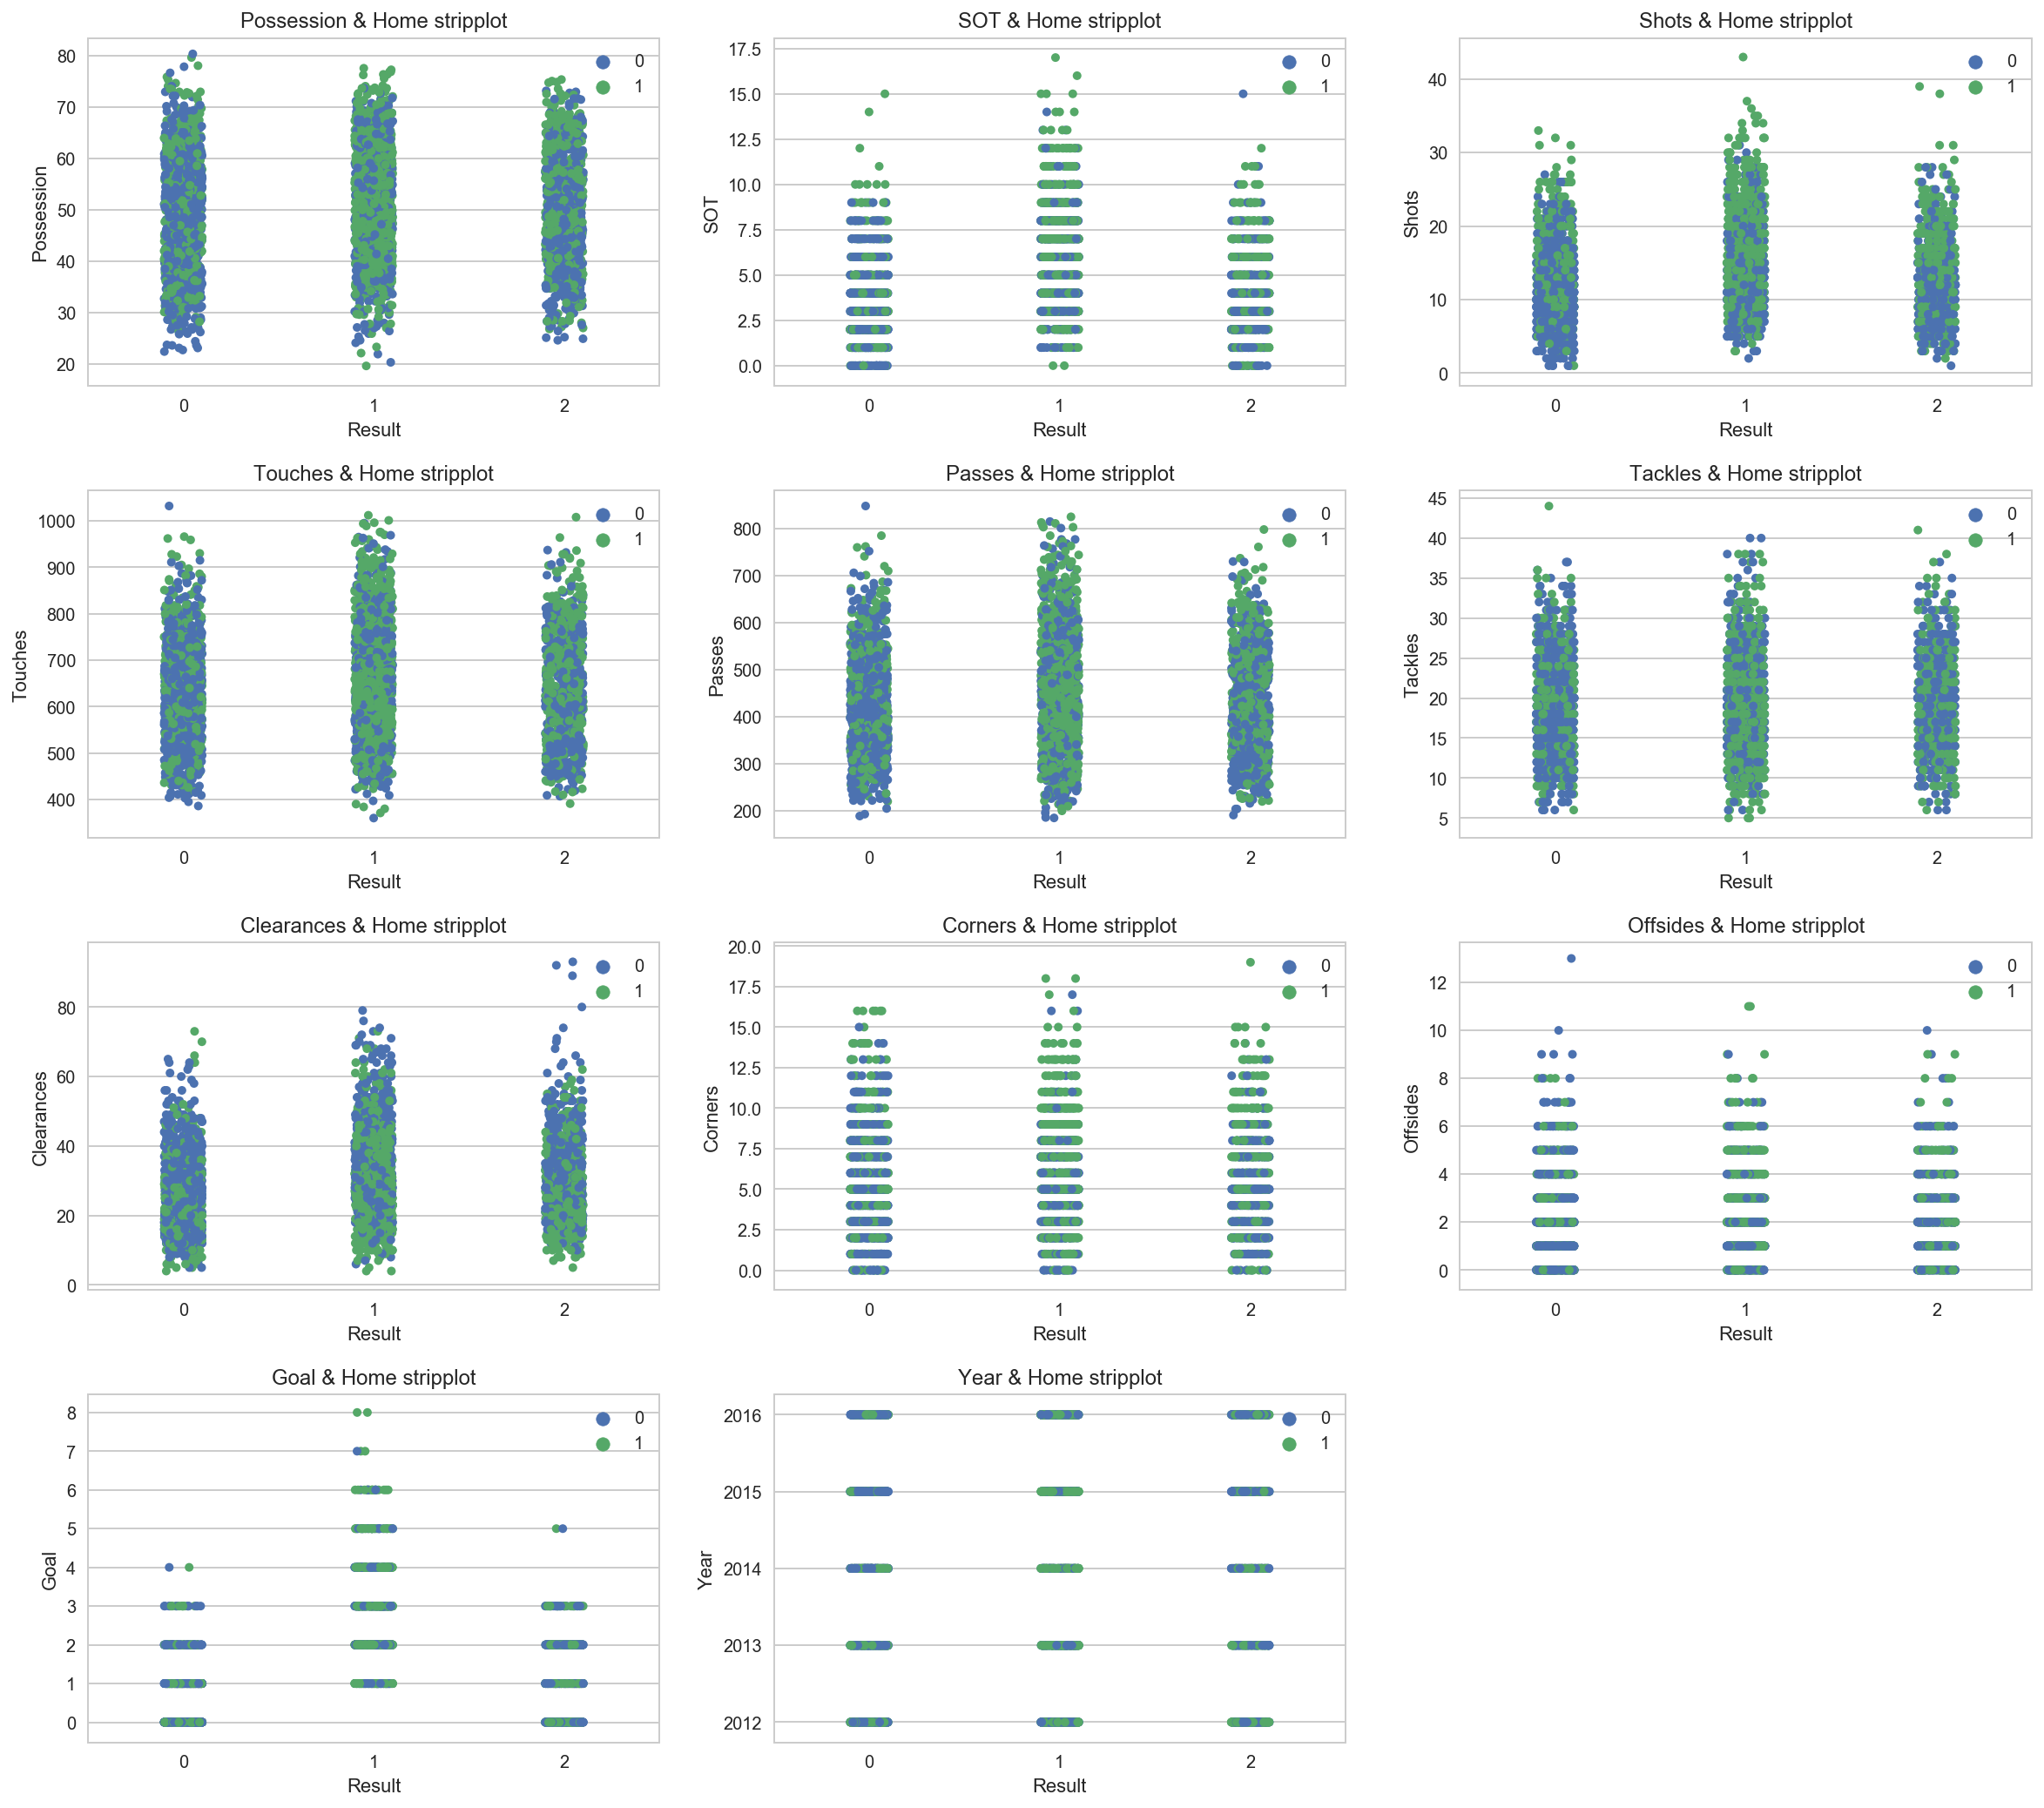

In [18]:
# detail stripplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 11+1) :
    plt.subplot(4, 3, i)
    sns.stripplot(x = train['Result'], y = train[train.columns[i]], hue = 'Home', data = train, jitter=True)
    plt.legend(loc = 1)
    plt.title('{} & Home stripplot'.format(train.columns[i]))

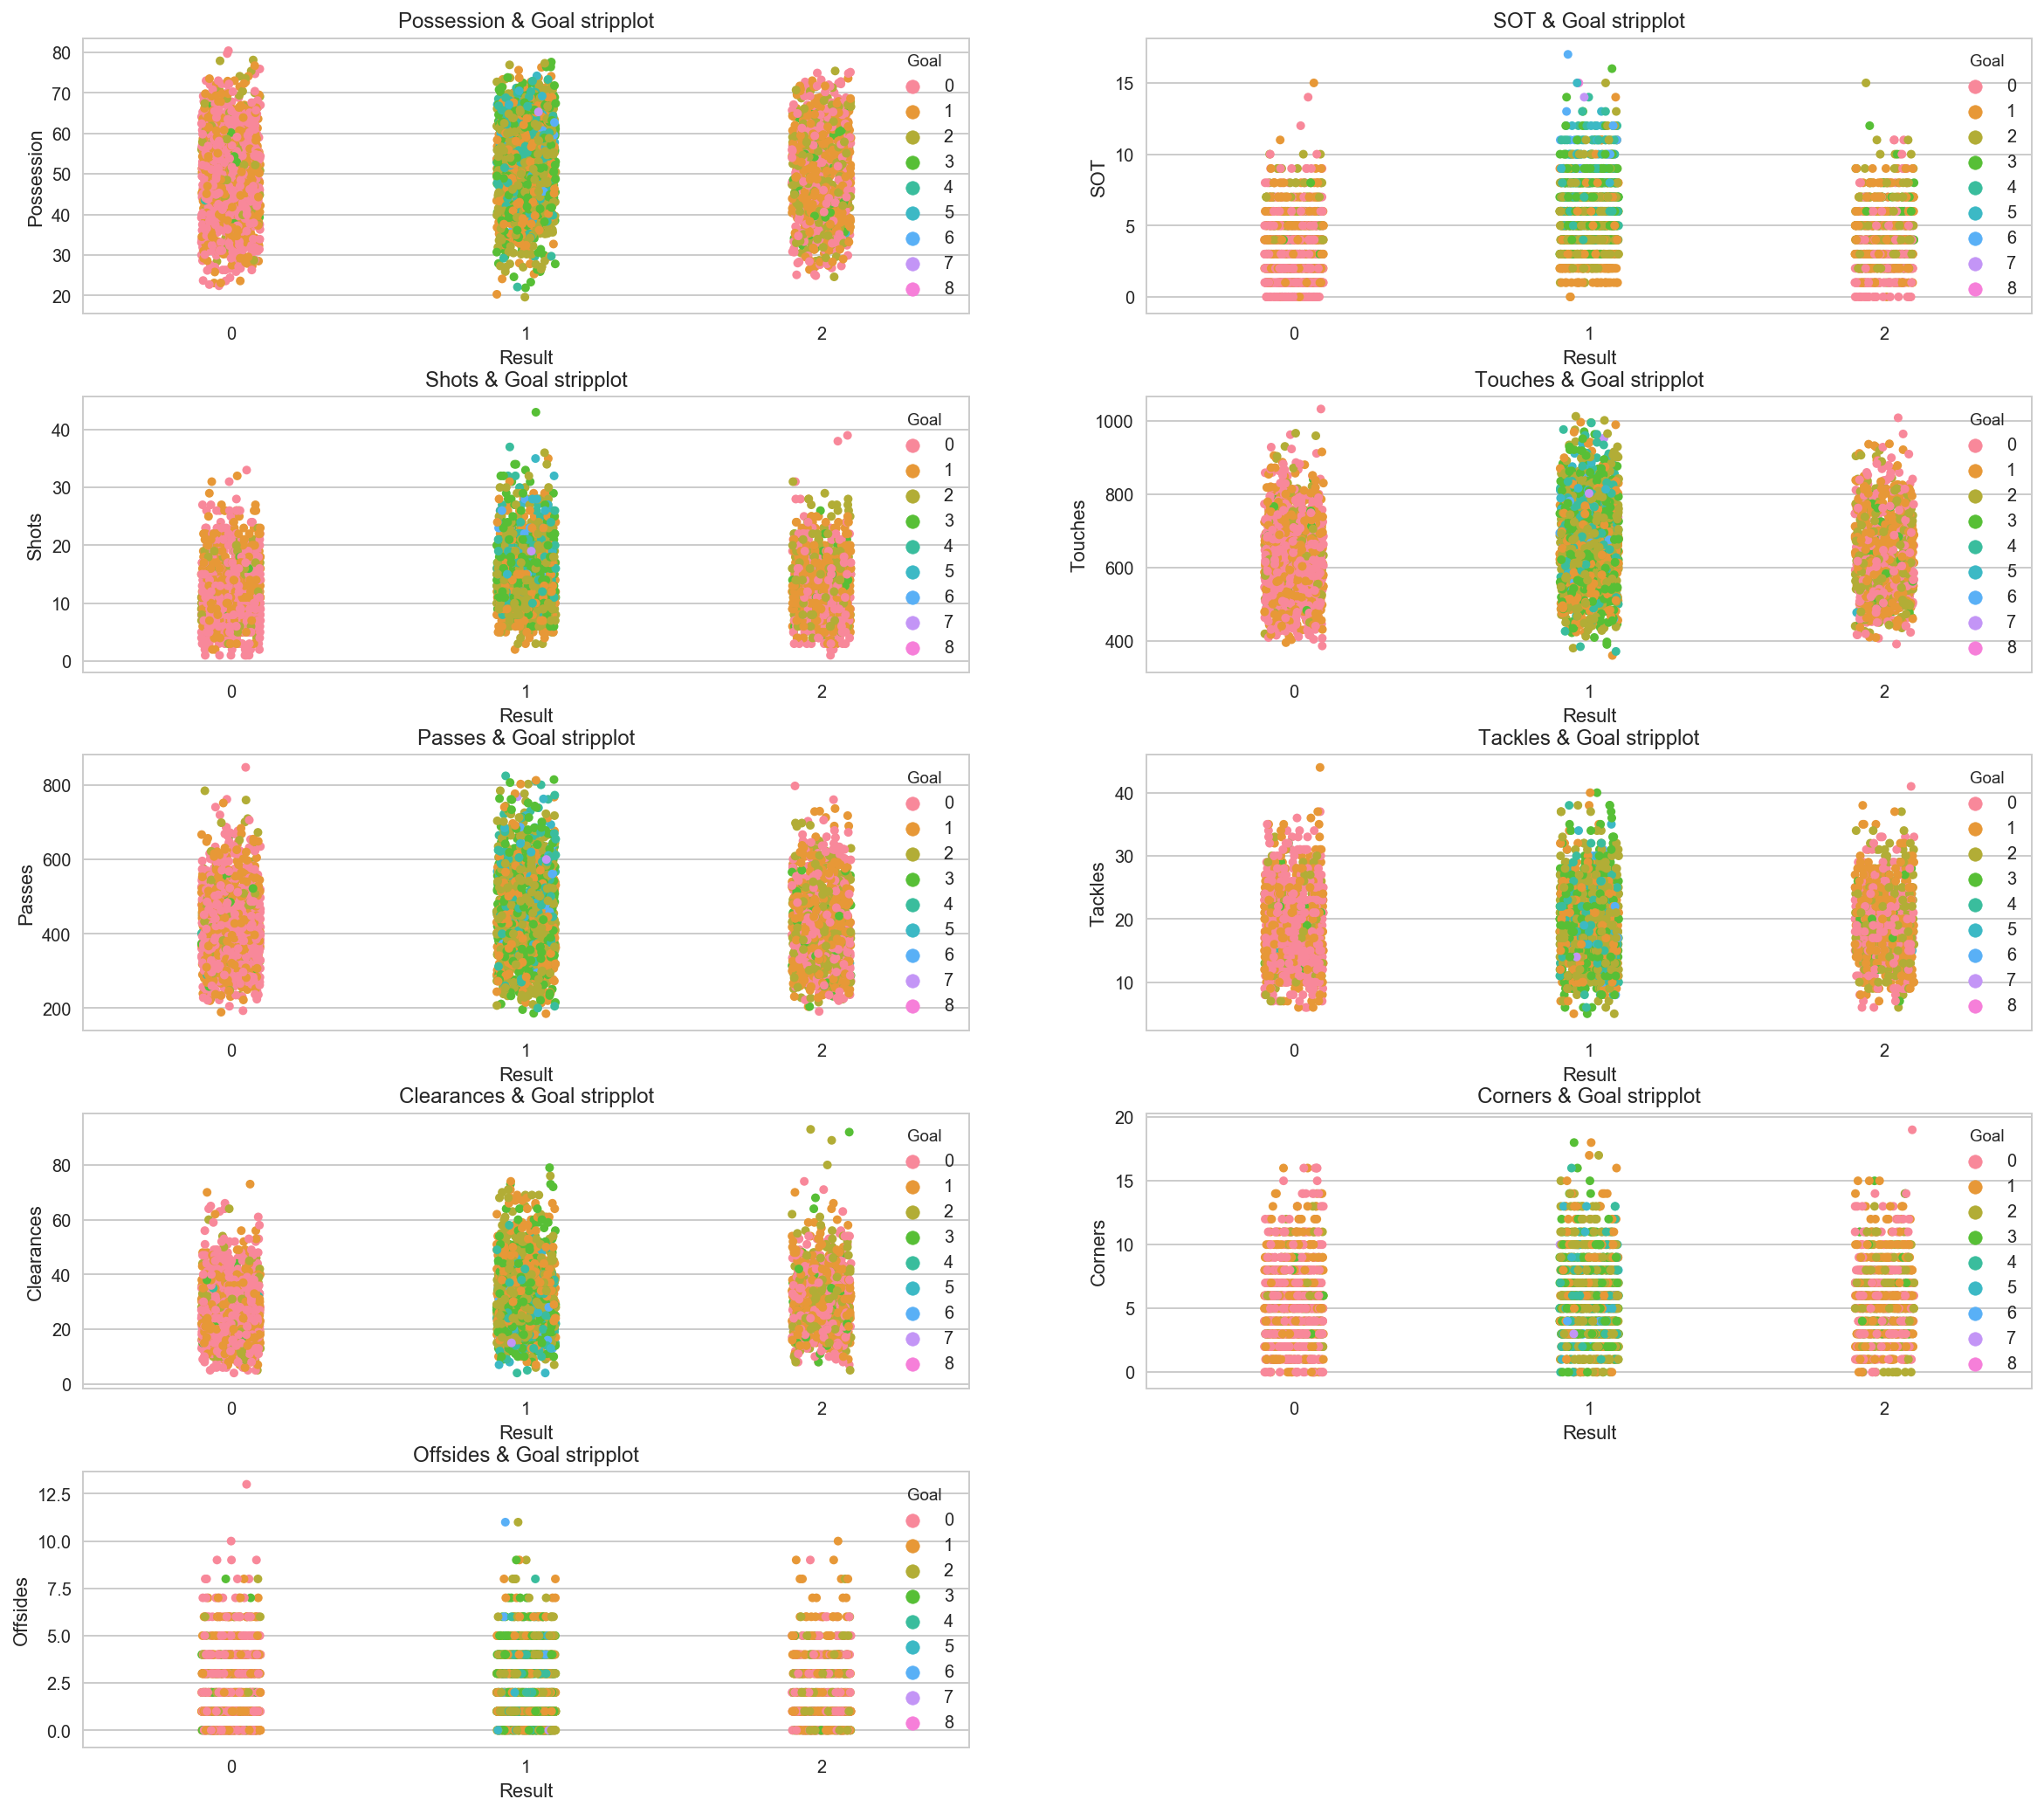

In [19]:
# detail stripplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 9+1) :
    plt.subplot(5, 2, i)
    sns.stripplot(x = train['Result'], y = train[train.columns[i]], hue = 'Goal', data = train, jitter=True)
    plt.title('{} & Goal stripplot'.format(train.columns[i]))

---

### 5. Y data & X data (three features)

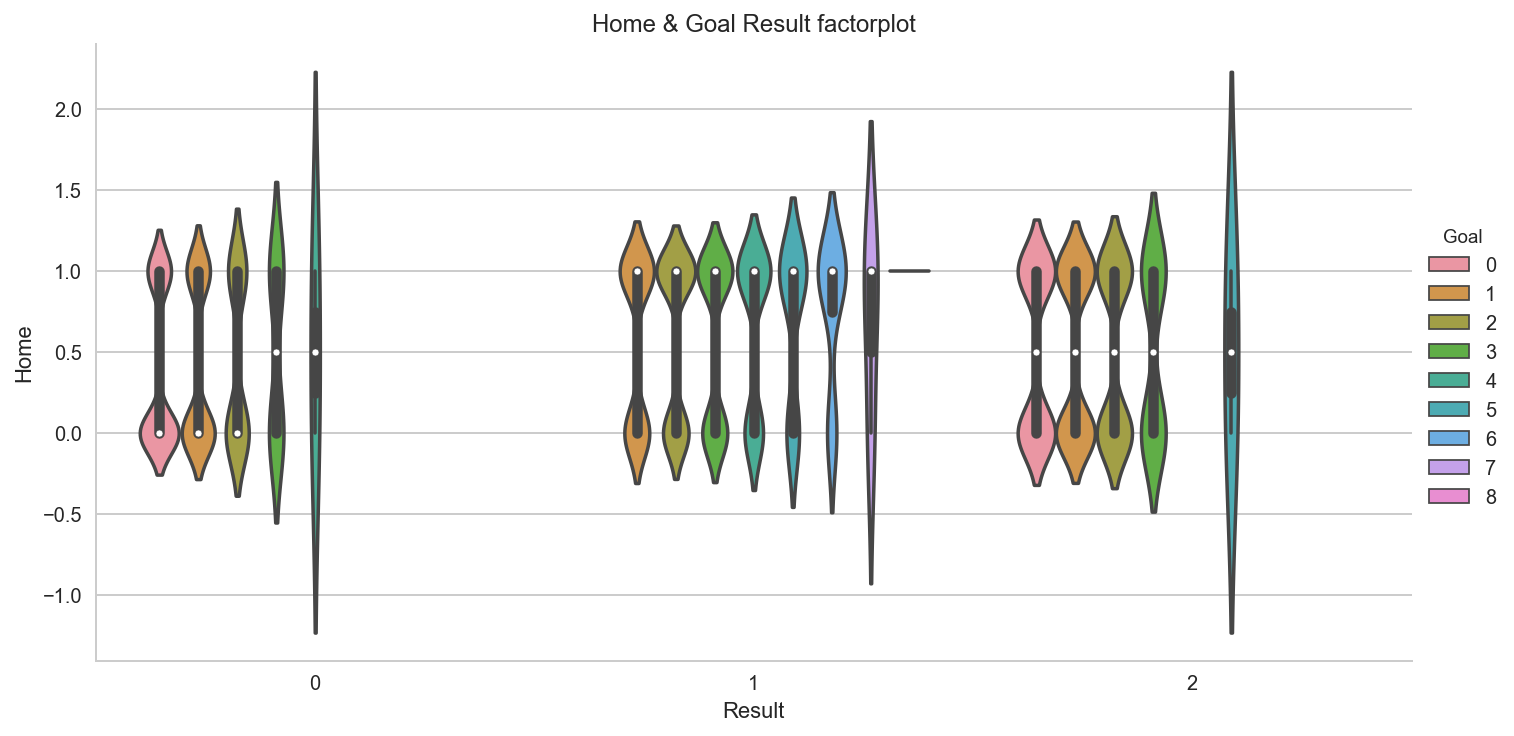

In [20]:
# factorplot
plt.figure(figsize=(20, 18))

sns.factorplot(x = 'Result', y = 'Home', hue = 'Goal', data = train,
               kind="violin", split = False, size = 5, aspect = 2)
plt.title('Home & Goal Result factorplot')
plt.show()

---

### 6. Groupby (pandas)

In [21]:
# Groupby SOT (mean)
train.groupby('SOT').mean()

Possession      Shots     Touches      Passes    Tackles  Clearances  \
SOT                                                                         
0     42.766667   6.911111  573.522222  377.577778  19.588889   29.011111   
1     43.411579   7.908772  582.466667  382.417544  19.014035   29.045614   
2     47.111641   9.853053  612.083969  409.047710  18.864504   29.854962   
3     47.590783  11.093702  616.327189  409.700461  18.978495   30.878648   
4     49.120955  12.342065  631.514638  424.066256  19.291217   29.425270   
5     50.962048  14.178715  652.361446  441.612450  19.032129   29.837349   
6     52.992152  15.531646  670.901266  462.096203  18.536709   28.402532   
7     55.202658  17.428571  694.780731  487.279070  18.368771   28.232558   
8     55.312281  18.467836  698.678363  487.438596  18.368421   28.725146   
9     58.454206  20.728972  743.785047  538.915888  18.046729   24.102804   
10    55.823529  22.058824  719.862745  510.705882  19.803922   24.509804   
11    59.236842  23.421053  745.710526  541.131579  18.210526   24.763158   
12    61.050000  25.272727  772.000000  554.590909  18.272727   24.772727   
13    62.383333  28.500000  780.333333  576.000000  15.833333   20.500000   
14    66.440000  28.600000  769.400000  549.400000  14.600000   23.200000   
15    61.260000  28.000000  767.600000  550.800000  13.400000   25.800000   
16    77.600000  43.000000  963.000000  761.000000  13.000000   12.000000   
17    59.600000  28.000000  766.000000  563.000000  19.000000   16.000000   

      Corners  Offsides      Goal         Year      Home    Result  
SOT                                                                 
0    3.388889  1.833333  0.066667  2014.022222  0.322222  0.555556  
1    3.901754  1.877193  0.350877  2014.214035  0.414035  0.610526  
2    4.414122  2.108779  0.624046  2014.112595  0.393130  0.687023  
3    4.801843  2.124424  0.986175  2013.998464  0.436252  0.875576  
4    5.326656  2.154083  1.280431  2013.996918  0.469954  0.878274  
5    5.889558  2.228916  1.556225  2013.961847  0.536145  0.949799  
6    6.012658  2.118987  1.924051  2013.934177  0.602532  0.992405  
7    6.378738  2.152824  2.099668  2013.873754  0.561462  1.016611  
8    6.766082  2.286550  2.245614  2013.836257  0.619883  1.023392  
9    7.186916  1.869159  2.682243  2013.943925  0.700935  1.000000  
10   7.000000  2.156863  3.254902  2013.784314  0.803922  1.019608  
11   7.526316  2.105263  3.289474  2014.078947  0.763158  1.105263  
12   9.000000  2.045455  3.590909  2014.045455  0.863636  1.000000  
13   9.666667  3.500000  4.000000  2013.666667  0.666667  1.000000  
14   9.800000  1.800000  3.000000  2014.600000  0.800000  0.800000  
15   7.000000  2.600000  3.600000  2014.400000  0.800000  1.000000  
16   9.000000  2.000000  3.000000  2014.000000  1.000000  1.000000  
17   6.000000  1.000000  6.000000  2016.000000  1.000000  1.000000

In [22]:
# Groupby SOT (count)
train.groupby('SOT').count()

Team  Possession  Shots  Touches  Passes  Tackles  Clearances  Corners  \
SOT                                                                           
0      90          90     90       90      90       90          90       90   
1     285         285    285      285     285      285         285      285   
2     524         524    524      524     524      524         524      524   
3     651         651    651      651     651      651         651      651   
4     649         649    649      649     649      649         649      649   
5     498         498    498      498     498      498         498      498   
6     395         395    395      395     395      395         395      395   
7     301         301    301      301     301      301         301      301   
8     171         171    171      171     171      171         171      171   
9     107         107    107      107     107      107         107      107   
10     51          51     51       51      51       51          51       51   
11     38          38     38       38      38       38          38       38   
12     22          22     22       22      22       22          22       22   
13      6           6      6        6       6        6           6        6   
14      5           5      5        5       5        5           5        5   
15      5           5      5        5       5        5           5        5   
16      1           1      1        1       1        1           1        1   
17      1           1      1        1       1        1           1        1   

     Offsides  Goal  Year  Home  Result  
SOT                                      
0          90    90    90    90      90  
1         285   285   285   285     285  
2         524   524   524   524     524  
3         651   651   651   651     651  
4         649   649   649   649     649  
5         498   498   498   498     498  
6         395   395   395   395     395  
7         301   301   301   301     301  
8         171   171   171   171     171  
9         107   107   107   107     107  
10         51    51    51    51      51  
11         38    38    38    38      38  
12         22    22    22    22      22  
13          6     6     6     6       6  
14          5     5     5     5       5  
15          5     5     5     5       5  
16          1     1     1     1       1  
17          1     1     1     1       1

In [23]:
# Groupby Shots (mean)
train.groupby('Shots').mean()

Possession        SOT     Touches      Passes    Tackles  Clearances  \
Shots                                                                         
1       34.957143   0.142857  514.000000  333.000000  20.571429   31.000000   
2       38.870000   0.700000  568.000000  380.700000  19.800000   27.400000   
3       38.259375   1.156250  531.937500  342.937500  18.218750   31.531250   
4       37.635556   1.488889  535.488889  340.600000  21.555556   30.711111   
5       40.075556   1.844444  554.311111  358.000000  19.122222   32.222222   
6       39.383824   1.985294  543.838235  346.139706  19.933824   32.433824   
7       42.203109   2.373057  572.601036  373.606218  19.253886   31.922280   
8       43.883173   2.778846  585.105769  379.254808  19.495192   33.889423   
9       46.463504   3.021898  615.321168  413.664234  18.996350   29.372263   
10      47.464952   3.286174  619.012862  413.022508  19.549839   31.183280   
11      48.069677   3.754839  623.516129  418.722581  19.167742   30.151613   
12      48.749351   4.090909  630.866883  421.948052  19.399351   30.399351   
13      50.191892   4.301158  638.741313  430.034749  18.969112   28.915058   
14      50.567969   4.710938  646.750000  437.703125  19.218750   28.832031   
15      52.504292   5.025751  663.716738  455.596567  18.570815   28.459227   
16      53.122000   5.360000  670.500000  461.050000  18.835000   28.015000   
17      54.909392   5.513812  685.701657  475.955801  17.983425   27.723757   
18      55.347143   5.571429  694.200000  485.514286  18.664286   27.850000   
19      57.387273   6.218182  707.272727  496.081818  17.681818   25.663636   
20      57.710000   6.790000  721.300000  511.820000  17.560000   26.550000   
21      59.455102   7.102041  721.663265  510.959184  17.591837   25.193878   
22      59.604225   6.873239  738.056338  521.366197  18.140845   25.521127   
23      60.321053   6.894737  752.210526  538.877193  18.771930   21.789474   
24      60.872973   7.702703  747.351351  537.648649  17.729730   24.000000   
25      61.454167   7.458333  748.708333  530.750000  15.500000   24.333333   
26      64.906897   8.413793  795.448276  586.241379  17.000000   23.689655   
27      62.520000   8.550000  787.850000  564.600000  18.550000   24.250000   
28      62.294737   9.052632  766.526316  553.526316  17.157895   20.894737   
29      62.690909   8.909091  743.454545  529.909091  15.363636   24.545455   
30      63.560000  10.000000  780.200000  568.200000  15.200000   26.000000   
31      61.357143  10.857143  728.571429  497.000000  14.285714   24.142857   
32      64.900000  10.857143  845.285714  622.714286  15.714286   22.000000   
33      67.450000   6.000000  761.500000  517.000000  18.000000   38.500000   
34      63.266667  13.333333  746.333333  538.000000  10.666667   25.333333   
35      61.250000  12.000000  729.000000  511.000000  16.000000   22.500000   
36      62.500000  13.000000  744.000000  543.000000   9.000000   17.000000   
37      66.600000  13.000000  813.000000  595.000000  19.000000   12.000000   
38      72.200000  11.000000  859.000000  646.000000   8.000000   25.000000   
39      72.400000   9.000000  781.000000  555.000000  14.000000   22.000000   
43      77.600000  16.000000  963.000000  761.000000  13.000000   12.000000   

         Corners  Offsides      Goal         Year      Home    Result  
Shots                                                                  
1       1.857143  1.857143  0.000000  2014.142857  0.142857  0.285714  
2       1.400000  2.100000  0.300000  2014.200000  0.100000  0.500000  
3       2.468750  2.250000  0.500000  2014.500000  0.343750  0.875000  
4       2.733333  2.022222  0.533333  2013.800000  0.222222  0.777778  
5       2.911111  1.877778  0.622222  2014.366667  0.200000  0.666667  
6       3.117647  2.117647  0.801471  2014.360294  0.338235  0.830882  
7       3.440415  2.093264  0.756477  2014.093264  0.316062  0.787565  
8       3.759615  2.192308  1.009615  20

In [24]:
# Groupby Shots (count)
train.groupby('Shots').count()

Team  Possession  SOT  Touches  Passes  Tackles  Clearances  Corners  \
Shots                                                                         
1         7           7    7        7       7        7           7        7   
2        10          10   10       10      10       10          10       10   
3        32          32   32       32      32       32          32       32   
4        45          45   45       45      45       45          45       45   
5        90          90   90       90      90       90          90       90   
6       136         136  136      136     136      136         136      136   
7       193         193  193      193     193      193         193      193   
8       208         208  208      208     208      208         208      208   
9       274         274  274      274     274      274         274      274   
10      311         311  311      311     311      311         311      311   
11      310         310  310      310     310      310         310      310   
12      308         308  308      308     308      308         308      308   
13      259         259  259      259     259      259         259      259   
14      256         256  256      256     256      256         256      256   
15      233         233  233      233     233      233         233      233   
16      200         200  200      200     200      200         200      200   
17      181         181  181      181     181      181         181      181   
18      140         140  140      140     140      140         140      140   
19      110         110  110      110     110      110         110      110   
20      100         100  100      100     100      100         100      100   
21       98          98   98       98      98       98          98       98   
22       71          71   71       71      71       71          71       71   
23       57          57   57       57      57       57          57       57   
24       37          37   37       37      37       37          37       37   
25       24          24   24       24      24       24          24       24   
26       29          29   29       29      29       29          29       29   
27       20          20   20       20      20       20          20       20   
28       19          19   19       19      19       19          19       19   
29       11          11   11       11      11       11          11       11   
30        5           5    5        5       5        5           5        5   
31        7           7    7        7       7        7           7        7   
32        7           7    7        7       7        7           7        7   
33        2           2    2        2       2        2           2        2   
34        3           3    3        3       3        3           3        3   
35        2           2    2        2       2        2           2        2   
36        1           1    1        1       1        1           1        1   
37        1           1    1        1       1        1           1        1   
38        1           1    1        1       1        1           1        1   
39        1           1    1        1       1        1           1        1   
43        1           1    1        1       1        1           1        1   

       Offsides  Goal  Year  Home  Result  
Shots                                      
1             7     7     7     7       7  
2            10    10    10    10      10  
3            32    32    32    32      32  
4            45    45    45    45      45  
5            90    90    90    90      90  
6           136   136   136   136     136  
7           193   193   193   193     193  
8           208   208   208   208     208  
9           274   274   274   274     274  
10          311   311   311   311     311  
11          310   310   310   310     310  
12          308   308   308   308     308  
13          259   259   259   259     259  
14          256   256   256 

In [25]:
# Groupby Tackles (mean)
train.groupby('Tackles').mean()

Possession       SOT      Shots     Touches      Passes  Clearances  \
Tackles                                                                        
5         66.533333  6.333333  20.666667  793.000000  612.000000   26.000000   
6         56.791667  4.416667  13.833333  713.416667  514.750000   33.500000   
7         58.190000  4.650000  16.050000  690.650000  496.800000   28.400000   
8         57.303333  5.133333  16.300000  686.566667  488.700000   26.600000   
9         54.448148  5.111111  14.814815  668.296296  468.518519   28.962963   
10        53.809524  4.559524  14.476190  667.738095  475.392857   27.273810   
11        53.673913  4.739130  15.113043  659.695652  461.052174   28.669565   
12        51.882787  4.426230  13.590164  651.311475  453.803279   29.721311   
13        50.587222  4.088889  12.994444  641.233333  443.411111   28.244444   
14        52.511489  4.702128  14.012766  652.846809  450.646809   28.459574   
15        51.235714  4.466387  13.399160  646.907563  444.680672   29.453782   
16        51.299273  4.650909  14.101818  653.832727  452.018182   28.876364   
17        49.839338  4.264706  13.025735  637.544118  435.669118   28.422794   
18        49.975265  4.349823  13.409894  643.893993  437.289753   28.625442   
19        49.526721  4.461538  13.412955  641.032389  436.740891   27.198381   
20        49.416996  4.308300  12.363636  638.403162  429.786561   30.328063   
21        48.955823  4.253012  13.236948  636.963855  427.654618   29.277108   
22        48.594527  4.124378  12.646766  633.950249  422.402985   30.109453   
23        49.128646  4.322917  13.078125  645.489583  431.619792   29.505208   
24        48.007285  4.119205  11.933775  627.748344  414.668874   30.456954   
25        46.537008  4.118110  12.283465  617.677165  406.330709   30.047244   
26        47.272115  3.923077  12.240385  629.057692  414.576923   30.692308   
27        48.186747  4.590361  12.530120  641.734940  426.132530   29.771084   
28        46.675000  3.985294  11.647059  620.161765  400.294118   31.926471   
29        47.798148  3.833333  11.314815  637.648148  418.722222   30.370370   
30        46.578125  4.656250  12.375000  635.000000  410.968750   28.656250   
31        45.415625  3.906250  11.468750  623.375000  404.156250   28.906250   
32        47.741667  4.541667  13.416667  649.791667  425.125000   27.625000   
33        46.050000  3.642857  11.500000  625.642857  397.214286   34.428571   
34        47.750000  5.214286  12.928571  651.571429  419.357143   31.500000   
35        44.545455  4.727273  12.818182  625.545455  392.909091   30.727273   
36        51.533333  5.000000  14.333333  709.666667  478.000000   28.000000   
37        45.525000  4.875000  12.250000  648.125000  411.625000   39.500000   
38        45.300000  6.166667  14.000000  623.666667  404.333333   24.500000   
40        50.150000  5.000000   6.500000  634.500000  401.500000   51.000000   
41        48.500000  4.000000  13.000000  687.000000  407.000000   36.000000   
44        38.900000  5.000000  11.000000  563.000000  327.000000   14.000000   

           Corners  Offsides      Goal         Year      Home    Result  
Tackles                                                                  
5        10.333333  2.666667  2.000000  2014.666667  1.000000  1.000000  
6         5.833333  1.750000  1.583333  2014.750000  0.416667  0.916667  
7         7.200000  1.600000  1.050000  2015.100000  0.450000  0.700000  
8         6.366667  2.600000  1.500000  2014.333333  0.500000  0.833333  
9         6.666667  2.407407  1.314815  2014.444444  0.629630  1.018519  
10        6.166667  1.857143  1.333333  2014.297619  0.523810  0.785714  
11        6.086957  2.234783  1.365217  2014.078261  0.530435  0.834783  
12        5.139344  1.811475  1.352459  2014.262295  0.491803  0.893443  
13        5.350000  1.900000  1.233333  2014.233333  0.583333  0.750000  
14        5.863830  2.170213  1.336170  2013.902128  0.497872  0.872340  


In [26]:
# Groupby Tackles (count)
train.groupby('Tackles').count()

Team  Possession  SOT  Shots  Touches  Passes  Clearances  Corners  \
Tackles                                                                       
5           3           3    3      3        3       3           3        3   
6          12          12   12     12       12      12          12       12   
7          20          20   20     20       20      20          20       20   
8          30          30   30     30       30      30          30       30   
9          54          54   54     54       54      54          54       54   
10         84          84   84     84       84      84          84       84   
11        115         115  115    115      115     115         115      115   
12        122         122  122    122      122     122         122      122   
13        180         180  180    180      180     180         180      180   
14        235         235  235    235      235     235         235      235   
15        238         238  238    238      238     238         238      238   
16        275         275  275    275      275     275         275      275   
17        272         272  272    272      272     272         272      272   
18        283         283  283    283      283     283         283      283   
19        247         247  247    247      247     247         247      247   
20        253         253  253    253      253     253         253      253   
21        249         249  249    249      249     249         249      249   
22        201         201  201    201      201     201         201      201   
23        192         192  192    192      192     192         192      192   
24        151         151  151    151      151     151         151      151   
25        127         127  127    127      127     127         127      127   
26        104         104  104    104      104     104         104      104   
27         83          83   83     83       83      83          83       83   
28         68          68   68     68       68      68          68       68   
29         54          54   54     54       54      54          54       54   
30         32          32   32     32       32      32          32       32   
31         32          32   32     32       32      32          32       32   
32         24          24   24     24       24      24          24       24   
33         14          14   14     14       14      14          14       14   
34         14          14   14     14       14      14          14       14   
35         11          11   11     11       11      11          11       11   
36          3           3    3      3        3       3           3        3   
37          8           8    8      8        8       8           8        8   
38          6           6    6      6        6       6           6        6   
40          2           2    2      2        2       2           2        2   
41          1           1    1      1        1       1           1        1   
44          1           1    1      1        1       1           1        1   

         Offsides  Goal  Year  Home  Result  
Tackles                                      
5               3     3     3     3       3  
6              12    12    12    12      12  
7              20    20    20    20      20  
8              30    30    30    30      30  
9              54    54    54    54      54  
10             84    84    84    84      84  
11            115   115   115   115     115  
12            122   122   122   122     122  
13            180   180   180   180     180  
14            235   235   235   235     235  
15            238   238   238   238     238  
16            275   275   275   275     275  
17            272   272   272   272     272  
18            283   283   283   283     283  
19            247   247   247   247     247  
20            253   253   253   253     253  
21            249   249   249   249     249  
22            201   201   201   201     201  
23     

In [27]:
# Groupby Corners (mean)
train.groupby('Corners').mean()

Possession        SOT      Shots     Touches      Passes    Tackles  \
Corners                                                                        
0         41.048485   2.651515   7.818182  584.712121  389.590909  18.818182   
1         42.938889   3.040404   9.005051  590.792929  391.661616  19.717172   
2         43.508046   3.356322   9.629310  584.862069  383.448276  20.083333   
3         46.460285   3.800407  10.887984  613.912424  410.138493  19.403259   
4         47.990720   4.034091  11.960227  625.431818  420.295455  19.198864   
5         49.799802   4.268775  12.851779  643.772727  437.055336  18.885375   
6         50.918078   4.592677  13.707094  646.501144  440.759725  18.684211   
7         52.493500   4.830000  14.602500  663.847500  456.070000  18.287500   
8         54.372474   5.041812  15.829268  682.689895  471.634146  18.515679   
9         56.454144   5.701657  16.806630  698.790055  486.834254  18.281768   
10        56.616058   5.715328  18.598540  696.416058  479.649635  17.897810   
11        58.148387   5.204301  17.860215  695.580645  480.032258  17.301075   
12        61.953659   6.170732  20.804878  761.658537  543.609756  17.243902   
13        62.717500   7.225000  21.450000  746.600000  528.875000  17.825000   
14        62.904167   5.875000  21.666667  742.083333  518.583333  17.916667   
15        67.555556   6.555556  20.666667  773.444444  565.111111  14.222222   
16        63.577778   5.777778  20.000000  756.333333  523.444444  17.666667   
17        66.100000  10.000000  28.500000  787.000000  576.500000  10.000000   
18        59.650000   8.500000  27.000000  726.000000  486.500000  15.000000   
19        72.200000  11.000000  38.000000  859.000000  646.000000   8.000000   

         Clearances  Offsides      Goal         Year      Home    Result  
Corners                                                                   
0         34.409091  2.242424  1.212121  2013.969697  0.409091  0.787879  
1         32.318182  2.055556  1.015152  2014.247475  0.328283  0.772727  
2         32.882184  2.014368  1.195402  2013.954023  0.373563  0.873563  
3         31.517312  2.215886  1.346232  2014.034623  0.421589  0.798371  
4         30.693182  2.092803  1.365530  2014.047348  0.452652  0.867424  
5         29.594862  2.223320  1.416996  2014.033597  0.478261  0.877470  
6         27.901602  2.107551  1.389016  2013.924485  0.498856  0.858124  
7         26.352500  2.025000  1.430000  2014.002500  0.562500  0.922500  
8         27.487805  2.045296  1.484321  2013.933798  0.574913  0.885017  
9         25.662983  2.149171  1.563536  2013.977901  0.651934  0.972376  
10        25.708029  2.255474  1.554745  2013.912409  0.729927  0.985401  
11        26.268817  2.043011  1.290323  2014.107527  0.720430  0.870968  
12        24.073171  2.000000  1.195122  2013.560976  0.658537  0.951220  
13        23.250000  2.175000  1.525000  2013.800000  0.775000  1.000000  
14        22.333333  1.958333  1.000000  2013.625000  0.833333  0.750000  
15        18.111111  3.222222  1.333333  2013.888889  0.888889  1.222222  
16        23.222222  2.222222  1.111111  2014.000000  0.777778  0.333333  
17        23.000000  2.000000  1.500000  2014.000000  0.500000  1.000000  
18        16.500000  2.000000  2.000000  2014.500000  1.000000  1.000000  
19        25.000000  0.000000  0.000000  2016.000000  1.000000  2.000000

In [28]:
# Groupby Corners (count)
train.groupby('Corners').count()

Team  Possession  SOT  Shots  Touches  Passes  Tackles  Clearances  \
Corners                                                                       
0          66          66   66     66       66      66       66          66   
1         198         198  198    198      198     198      198         198   
2         348         348  348    348      348     348      348         348   
3         491         491  491    491      491     491      491         491   
4         528         528  528    528      528     528      528         528   
5         506         506  506    506      506     506      506         506   
6         437         437  437    437      437     437      437         437   
7         400         400  400    400      400     400      400         400   
8         287         287  287    287      287     287      287         287   
9         181         181  181    181      181     181      181         181   
10        137         137  137    137      137     137      137         137   
11         93          93   93     93       93      93       93          93   
12         41          41   41     41       41      41       41          41   
13         40          40   40     40       40      40       40          40   
14         24          24   24     24       24      24       24          24   
15          9           9    9      9        9       9        9           9   
16          9           9    9      9        9       9        9           9   
17          2           2    2      2        2       2        2           2   
18          2           2    2      2        2       2        2           2   
19          1           1    1      1        1       1        1           1   

         Offsides  Goal  Year  Home  Result  
Corners                                      
0              66    66    66    66      66  
1             198   198   198   198     198  
2             348   348   348   348     348  
3             491   491   491   491     491  
4             528   528   528   528     528  
5             506   506   506   506     506  
6             437   437   437   437     437  
7             400   400   400   400     400  
8             287   287   287   287     287  
9             181   181   181   181     181  
10            137   137   137   137     137  
11             93    93    93    93      93  
12             41    41    41    41      41  
13             40    40    40    40      40  
14             24    24    24    24      24  
15              9     9     9     9       9  
16              9     9     9     9       9  
17              2     2     2     2       2  
18              2     2     2     2       2  
19              1     1     1     1       1

In [29]:
# Groupby Offsides (mean)
train.groupby('Offsides').mean()

Possession       SOT      Shots     Touches      Passes    Tackles  \
Offsides                                                                       
0          49.540490  4.218456  13.235405  639.022599  435.355932  18.873823   
1          50.264700  4.291103  13.025145  644.071567  438.535783  18.811412   
2          49.929279  4.412271  13.413348  643.409042  437.161464  18.897740   
3          50.689433  4.562021  13.511485  648.782542  440.620214  18.557427   
4          49.080061  4.392638  13.012270  635.107362  427.018405  19.374233   
5          49.270950  4.474860  13.122905  640.603352  430.854749  18.698324   
6          49.510112  4.213483  12.393258  635.808989  424.359551  18.943820   
7          50.988889  4.148148  11.555556  662.259259  444.666667  22.037037   
8          49.772222  4.555556  12.555556  643.444444  423.833333  21.277778   
9          51.266667  4.777778  12.333333  639.111111  432.111111  16.555556   
10         55.700000  4.500000  11.500000  636.000000  421.500000  20.000000   
11         51.000000  8.500000  15.000000  709.000000  486.500000  20.000000   
13         62.400000  2.000000   9.000000  756.000000  568.000000  11.000000   

          Clearances   Corners      Goal         Year      Home    Result  
Offsides                                                                   
0          28.453861  5.350282  1.267420  2014.111111  0.468927  0.822976  
1          28.768859  5.399420  1.347195  2014.088008  0.464217  0.894584  
2          29.248654  5.458558  1.330463  2013.963402  0.501615  0.858988  
3          29.316998  5.267994  1.482389  2014.004594  0.546708  0.905054  
4          30.361963  5.417178  1.386503  2013.865031  0.530675  0.843558  
5          30.134078  5.541899  1.486034  2013.837989  0.569832  0.916201  
6          31.044944  4.932584  1.337079  2013.719101  0.494382  0.820225  
7          27.851852  5.407407  1.185185  2013.444444  0.407407  0.666667  
8          30.222222  5.833333  1.333333  2013.777778  0.666667  0.888889  
9          31.444444  5.777778  0.888889  2013.777778  0.444444  1.000000  
10         27.000000  7.000000  0.500000  2014.000000  0.000000  1.000000  
11         23.500000  5.500000  4.000000  2013.000000  1.000000  1.000000  
13         24.000000  5.000000  0.000000  2016.000000  0.000000  0.000000

In [30]:
# Groupby Offsides (count)
train.groupby('Offsides').count()

Team  Possession   SOT  Shots  Touches  Passes  Tackles  Clearances  \
Offsides                                                                        
0          531         531   531    531      531     531      531         531   
1         1034        1034  1034   1034     1034    1034     1034        1034   
2          929         929   929    929      929     929      929         929   
3          653         653   653    653      653     653      653         653   
4          326         326   326    326      326     326      326         326   
5          179         179   179    179      179     179      179         179   
6           89          89    89     89       89      89       89          89   
7           27          27    27     27       27      27       27          27   
8           18          18    18     18       18      18       18          18   
9            9           9     9      9        9       9        9           9   
10           2           2     2      2        2       2        2           2   
11           2           2     2      2        2       2        2           2   
13           1           1     1      1        1       1        1           1   

          Corners  Goal  Year  Home  Result  
Offsides                                     
0             531   531   531   531     531  
1            1034  1034  1034  1034    1034  
2             929   929   929   929     929  
3             653   653   653   653     653  
4             326   326   326   326     326  
5             179   179   179   179     179  
6              89    89    89    89      89  
7              27    27    27    27      27  
8              18    18    18    18      18  
9               9     9     9     9       9  
10              2     2     2     2       2  
11              2     2     2     2       2  
13              1     1     1     1       1

In [31]:
# Groupby Goal (mean)
train.groupby('Goal').mean()

Possession        SOT      Shots     Touches      Passes    Tackles  \
Goal                                                                        
0      48.643041   2.872811  11.277419  624.939171  420.082949  18.611060   
1      49.235025   3.924714  12.741408  630.456628  422.230769  18.838789   
2      50.649821   5.089392  14.163290  652.170441  443.822408  19.059595   
3      51.675058   6.110855  15.200924  670.953811  463.066975  19.334873   
4      54.780128   7.487179  16.788462  706.615385  508.980769  18.705128   
5      57.422500   9.300000  20.350000  737.575000  539.525000  18.875000   
6      52.850000  10.050000  18.600000  698.500000  502.550000  19.000000   
7      59.266667  11.000000  20.666667  786.333333  593.333333  16.666667   
8      54.600000  12.500000  23.500000  699.500000  515.500000  17.000000   

      Clearances   Corners  Offsides         Year      Home    Result  
Goal                                                                   
0      27.625806  5.105069  2.077419  2014.010138  0.411060  0.560369  
1      29.642390  5.445172  2.106383  2014.009002  0.486907  0.885434  
2      31.072706  5.475566  2.112038  2013.960667  0.554231  1.129917  
3      30.369515  5.565820  2.198614  2013.993072  0.572748  1.041570  
4      25.564103  5.634615  2.237179  2014.147436  0.641026  0.987179  
5      23.525000  6.250000  2.250000  2013.825000  0.675000  1.050000  
6      23.900000  5.400000  2.650000  2014.050000  0.750000  1.000000  
7      19.000000  6.000000  1.000000  2013.666667  0.666667  1.000000  
8      25.000000  6.500000  3.000000  2013.000000  1.000000  1.000000

In [32]:
# Groupby Goal (count)
train.groupby('Goal').count()

Team  Possession   SOT  Shots  Touches  Passes  Tackles  Clearances  \
Goal                                                                        
0     1085        1085  1085   1085     1085    1085     1085        1085   
1     1222        1222  1222   1222     1222    1222     1222        1222   
2      839         839   839    839      839     839      839         839   
3      433         433   433    433      433     433      433         433   
4      156         156   156    156      156     156      156         156   
5       40          40    40     40       40      40       40          40   
6       20          20    20     20       20      20       20          20   
7        3           3     3      3        3       3        3           3   
8        2           2     2      2        2       2        2           2   

      Corners  Offsides  Year  Home  Result  
Goal                                         
0        1085      1085  1085  1085    1085  
1        1222      1222  1222  1222    1222  
2         839       839   839   839     839  
3         433       433   433   433     433  
4         156       156   156   156     156  
5          40        40    40    40      40  
6          20        20    20    20      20  
7           3         3     3     3       3  
8           2         2     2     2       2

In [33]:
# Groupby Result (mean)
train.groupby('Result').mean()

Possession       SOT      Shots     Touches      Passes    Tackles  \
Result                                                                       
0         48.21049  3.332168  11.613287  622.753846  419.338462  18.664336   
1         51.78951  5.686713  15.025175  668.597902  460.858741  18.975524   
2         50.00000  3.969149  12.863830  635.107447  425.311702  19.030851   

        Clearances   Corners  Offsides      Goal         Year      Home  
Result                                                                   
0        26.413287  5.116783  2.083916  0.569231  2014.013287  0.397902  
1        31.094406  5.633566  2.179720  2.390210  2014.013287  0.602098  
2        30.526596  5.417021  2.080851  1.008511  2013.959574  0.500000

In [34]:
# Groupby Result (count)
train.groupby('Result').count()

Team  Possession   SOT  Shots  Touches  Passes  Tackles  Clearances  \
Result                                                                        
0       1430        1430  1430   1430     1430    1430     1430        1430   
1       1430        1430  1430   1430     1430    1430     1430        1430   
2        940         940   940    940      940     940      940         940   

        Corners  Offsides  Goal  Year  Home  
Result                                       
0          1430      1430  1430  1430  1430  
1          1430      1430  1430  1430  1430  
2           940       940   940   940   940

---

### 7. Correlation

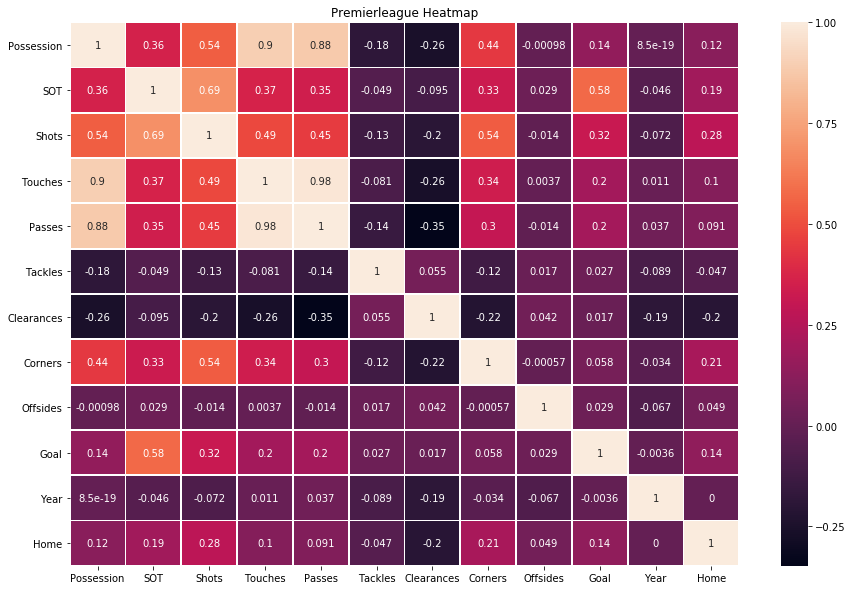

In [39]:
# correlation
correlation = train.drop(['Team', 'Result'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('Premierleague Heatmap')
plt.show()